In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stat
from sklearn.linear_model import LogisticRegression

# Automatically import the libraries into Jupyter Notebook
from scipy.stats import gaussian_kde
import seaborn as sn
from sklearn.inspection import permutation_importance
from PIL import Image
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math
import pandas as pd
import torch
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import time
from sklearn.utils import shuffle

import pandas as pd
import numpy as np

from IPython import get_ipython
ipython = get_ipython()

# If in ipython, load autoreload extension
if 'ipython' in globals():
    ipython.magic('load_ext autoreload')
    ipython.magic('autoreload 2')

# Import Statements

import os
import numpy as np
import pandas as pd
import csv
import datetime as dt

import time

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from matplotlib import pyplot
import matplotlib.gridspec as gridspec
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import itertools
from sklearn import preprocessing
import seaborn as sns
import datetime as datetime
from datetime import timedelta
from scipy.stats import kurtosis
from scipy.stats import skew

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


#from sklearn.inspection import partial_dependence
#from sklearn.inspection import plot_partial_dependence
from sklearn.linear_model import LinearRegression

from pathlib import Path

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from numpy import dstack
from pandas import read_csv
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support
from sklearn import model_selection

from sklearn.metrics import roc_curve, auc

## scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import ticker
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import permetrics

import pickle

import random
import itertools

import warnings
warnings.filterwarnings('ignore')

import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

print('All libraries have been loaded.')

All libraries have been loaded.


### Q1

In [2]:
df_athletes = pd.read_csv('athletes.csv')
# df_countries = pd.read_csv('countries.csv')
# df_events = pd.read_csv('events.csv', encoding='latin-1')

קובץ הנתונים מכיל את שמות כל הספורטאים המשתתפים באולימפיאדה ב-2016. 
הנתונים כוללים מידע אישי על כל ספורטאי וכן את השתייכותו הלאומית

link: https://www.kaggle.com/rio2016/olympic-games


- ייבוא
- מחיקה של עמודות המספר המזהה, שם ותאריך לידה

In [3]:
df_athletes = pd.read_csv('athletes.csv')
del df_athletes['id']
del df_athletes['name']
del df_athletes['dob']


נדרש שני משתנים בינאריים ולכן אוסיף עמודה המכילה מידע האם המשתתף זכה במדליה או לא

In [4]:
df_athletes['if_medal'] = False
df_athletes['if_medal'][df_athletes['gold'] != 0] = True
df_athletes['if_medal'][df_athletes['silver'] !=0] = True
df_athletes['if_medal'][df_athletes['bronze'] !=0] = True

In [5]:
df_athletes

,nationality,sex,height,weight,sport,gold,silver,bronze,if_medal
0,ESP,male,1.72,64.0,athletics,0,0,0,False
1,KOR,female,1.68,56.0,fencing,0,0,0,False
2,CAN,male,1.98,79.0,athletics,0,0,1,True
3,MDA,male,1.83,80.0,taekwondo,0,0,0,False
4,NZL,male,1.81,71.0,cycling,0,0,0,False
...,...,...,...,...,...,...,...,...,...
11533,CUB,female,1.64,58.0,athletics,0,0,0,False
11534,CZE,female,1.73,63.0,athletics,0,0,0,False
11535,CHN,male,1.85,100.0,wrestling,0,0,0,False
11536,VIE,male,1.60,56.0,weightlifting,0,0,0,False


פירוט כללי על המשתנים (שם, כמות, סוג)

 | Column | Count | type |
| --- | --- | --- |
 |sex         | 11538 |  Categorical - Binary 
 |   height   |    11208 |  numerical
 |   weight   |    10879|  numerical
 |   sport    |    11538|  Categorical 
 |   gold     |    11538 |  numerical  
 |   silver   |    11538 |  numerical  
 | bronze     |  11538|  numerical  
 |  if_medal  |   11538 |  Categorical - Binary
 

## Q2
### משתנים נומריים
- טבלה מסכמת עבור משתנים נומריים



In [6]:
df_describe = df_athletes.describe().round(2)
df_describe.iloc[0,:] = len(df_athletes) - df_describe.iloc[0,:]
df_describe
df_describe = df_describe.rename(index={'count': "missing values"})
(df_describe)

,height,weight,gold,silver,bronze
missing values,330.00,659.00,0.00,0.00,0.00
mean,1.77,72.07,0.06,0.06,0.06
std,0.11,16.18,0.26,0.24,0.24
min,1.21,31.00,0.00,0.00,0.00
25%,1.69,60.00,0.00,0.00,0.00
50%,1.76,70.00,0.00,0.00,0.00
75%,1.84,81.00,0.00,0.00,0.00
max,2.21,170.00,5.00,2.00,2.00


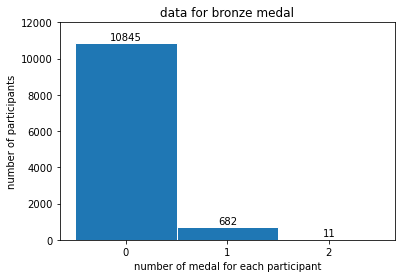

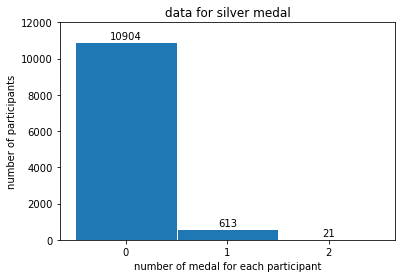

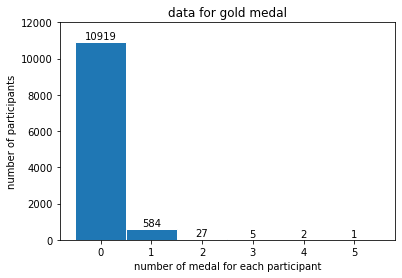

It can be seen that most of the participants did not win medals, also it can be seen that there is one participant who won 5 gold medals.


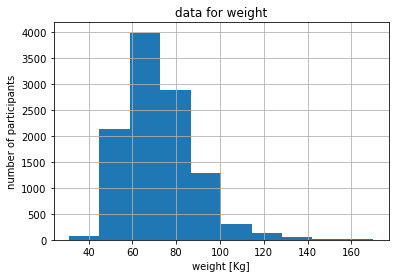

You can see that in the weight category between 60 and 70 kg there are the most participants


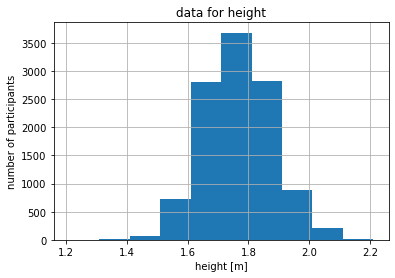

You can see that in the 170-180 cm category there are the most participants


In [7]:
# a histogram returns 3 objects : n (i.e. frequncies), bins, patches
freq, bins, patches = plt.hist(df_athletes['bronze'], edgecolor='white',bins=range(0,2 + df_athletes['bronze'].max()))
# x coordinate for labels + +
bin_centers = np.diff(bins)*0.5 + bins[:-1]
n = 0
for fr, x, patch in zip(freq, bin_centers, patches):
  height = int(freq[n])
  plt.annotate("{}".format(height),
               xy = (x, height),             # top left corner of the histogram bar
               xytext = (0,1),             # offsetting label position above its bar
               textcoords = "offset points", # Offset (in points) from the *xy* value
               ha = 'center', va = 'bottom')
  n = n+1
plt.ylim([0,12000])
plt.xticks(bin_centers, bins[:-1])  # Set text labels and properties.
plt.xlabel('number of medal for each participant')
plt.ylabel('number of participants')
plt.title('data for bronze medal')
plt.show()

# a histogram returns 3 objects : n (i.e. frequncies), bins, patches
freq, bins, patches = plt.hist(df_athletes['silver'], edgecolor='white',bins=range(0,2 + df_athletes['silver'].max()))
# x coordinate for labels + +
bin_centers = np.diff(bins)*0.5 + bins[:-1]
n = 0
for fr, x, patch in zip(freq, bin_centers, patches):
  height = int(freq[n])
  plt.annotate("{}".format(height),
               xy = (x, height),             # top left corner of the histogram bar
               xytext = (0,1),             # offsetting label position above its bar
               textcoords = "offset points", # Offset (in points) from the *xy* value
               ha = 'center', va = 'bottom')
  n = n+1
plt.ylim([0,12000])
plt.xticks(bin_centers, bins[:-1])  # Set text labels and properties.
plt.xlabel('number of medal for each participant')
plt.ylabel('number of participants')
plt.title('data for silver medal')
plt.show()


# a histogram returns 3 objects : n (i.e. frequncies), bins, patches
freq, bins, patches = plt.hist(df_athletes['gold'], edgecolor='white',bins=range(0,2 + df_athletes['gold'].max()))
# x coordinate for labels + +
bin_centers = np.diff(bins)*0.5 + bins[:-1]
n = 0
for fr, x, patch in zip(freq, bin_centers, patches):
  height = int(freq[n])
  plt.annotate("{}".format(height),
               xy = (x, height),             # top left corner of the histogram bar
               xytext = (0,1),             # offsetting label position above its bar
               textcoords = "offset points", # Offset (in points) from the *xy* value
               ha = 'center', va = 'bottom')
  n = n+1
plt.ylim([0,12000])
plt.xticks(bin_centers, bins[:-1])  # Set text labels and properties.
plt.xlabel('number of medal for each participant')
plt.ylabel('number of participants')
plt.title('data for gold medal')
plt.show()

print('It can be seen that most of the participants did not win medals, also it can be seen that there is one participant who won 5 gold medals.')
##

plt.hist(df_athletes['weight']);
plt.xlabel('weight [Kg]')
plt.ylabel('number of participants')
plt.title('data for weight')
plt.grid()
plt.show()
print('You can see that in the weight category between 60 and 70 kg there are the most participants')

plt.hist(df_athletes['height']);
plt.xlabel('height [m]')
plt.ylabel('number of participants')
plt.title('data for height')
plt.grid()
plt.show()
print('You can see that in the 170-180 cm category there are the most participants')


### משתנים קטגוריאליים

- אין ערכים חסרים
- אני חושב שאין צורך להציג טבלה, ניתן להבין את כל הנדרש מהאיורים המצורפים

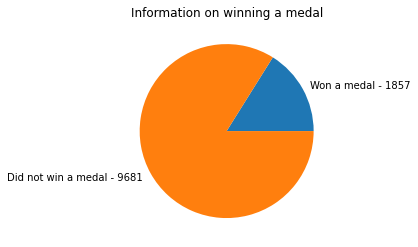

It can be seen that most of the participants did not win a medal


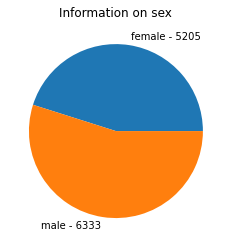

It can be seen that the proportion of men competing in the Olympics is significantly higher than the proportion of women (relative to the distribution of the population)


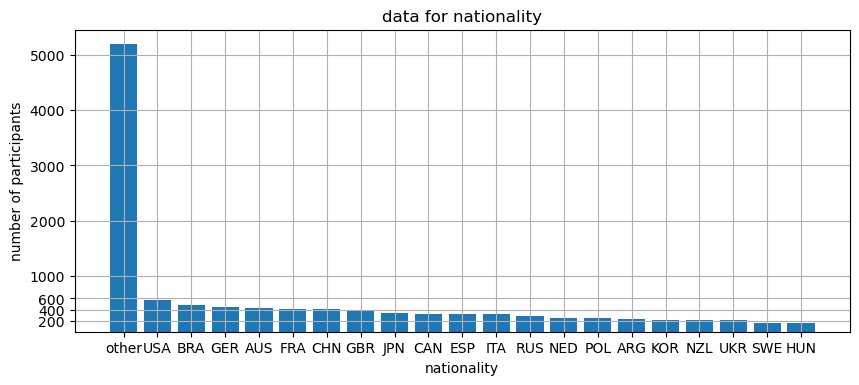

It can be seen that the United States sent the most athletes and then Brazil and Germany


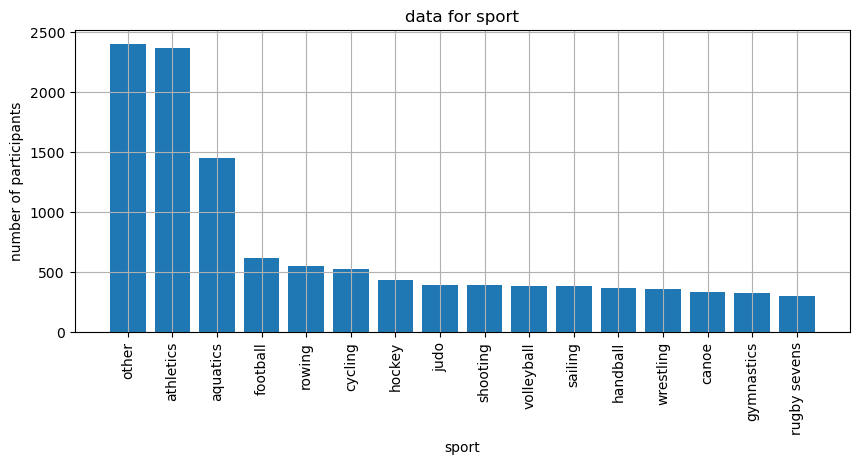

It can be seen that athletics has the largest number of participants


In [8]:
no = int(len(df_athletes[df_athletes['if_medal'] == False]))
yes = int(len(df_athletes[df_athletes['if_medal'] == True]))
plt.pie([yes, no], labels = [f'Won a medal - {yes}' , f'Did not win a medal - {no}']);
plt.title('Information on winning a medal');
plt.show()
print('It can be seen that most of the participants did not win a medal')

no = int(len(df_athletes[df_athletes['sex'] == 'male']))
yes = int(len(df_athletes[df_athletes['sex'] == 'female']))
plt.pie([yes, no], labels = [f'female - {yes}' , f'male - {no}']);
plt.title('Information on sex');
plt.show()
print('It can be seen that the proportion of men competing in the Olympics is significantly higher than the proportion of women (relative to the distribution of the population)')

n = 20
labels = df_athletes['nationality'].value_counts()[:n].index.tolist()
count = df_athletes['nationality'].value_counts()[:n].tolist()

labels.insert(0, 'other')
count.insert(0, len(df_athletes)-sum(count))
plt.figure(figsize=(10,4), dpi = 100)    
plt.bar(labels, count)
plt.xlabel('nationality')
# ticks=None, labels=None
plt.yticks(ticks=[200,400,600,1000,2000,3000,4000,5000],labels=[200,400,600,1000,2000,3000,4000,5000])
plt.ylabel('number of participants')
plt.title('data for nationality')
plt.grid()
plt.show()
print('It can be seen that the United States sent the most athletes and then Brazil and Germany')
n = 15
labels = df_athletes['sport'].value_counts()[:n].index.tolist()
count = df_athletes['sport'].value_counts()[:n].tolist()

labels.insert(0, 'other')
count.insert(0, len(df_athletes)-sum(count))
plt.figure(figsize=(10,4), dpi = 100)    

plt.bar(labels, count)
plt.xticks(rotation='vertical')

plt.xlabel('sport')
plt.ylabel('number of participants')
plt.title('data for sport')
plt.grid()
plt.show()
print('It can be seen that athletics has the largest number of participants')

## Q3

### שאלות מחקר

#### שאלת רגרסיה
האם עליה במשקל גורמת לעלייה בגובה?

#### שאלת רגרסיה
האם עליה בגובה גורמת לעלייה בהסתברות שהספורטאי יזכה במדליה כלשהי?

####  שאלת מבחן בין משתנה רציף לבינארי
האם הערך של משתנה המשקל שונה בין גברים לנשים?


####  שאלת מבחן בין משתנה רציף לקטגוריאלי
האם הערך של משתנה המשקל שונה בין ענפי ספורט שונים?



# Part 2

## Q1

#### add feature - BMI
BMI = weight/ height^2

In [9]:
df_athletes['BMI'] = df_athletes['weight']/(df_athletes['height']**2)

In [10]:
df_athletes


,nationality,sex,height,weight,sport,gold,silver,bronze,if_medal,BMI
0,ESP,male,1.72,64.0,athletics,0,0,0,False,21.633315
1,KOR,female,1.68,56.0,fencing,0,0,0,False,19.841270
2,CAN,male,1.98,79.0,athletics,0,0,1,True,20.151005
3,MDA,male,1.83,80.0,taekwondo,0,0,0,False,23.888441
4,NZL,male,1.81,71.0,cycling,0,0,0,False,21.672110
...,...,...,...,...,...,...,...,...,...,...
11533,CUB,female,1.64,58.0,athletics,0,0,0,False,21.564545
11534,CZE,female,1.73,63.0,athletics,0,0,0,False,21.049818
11535,CHN,male,1.85,100.0,wrestling,0,0,0,False,29.218408
11536,VIE,male,1.60,56.0,weightlifting,0,0,0,False,21.875000


In [11]:
set(df_athletes.sport)

{'aquatics',
 'archery',
 'athletics',
 'badminton',
 'basketball',
 'boxing',
 'canoe',
 'cycling',
 'equestrian',
 'fencing',
 'football',
 'golf',
 'gymnastics',
 'handball',
 'hockey',
 'judo',
 'modern pentathlon',
 'rowing',
 'rugby sevens',
 'sailing',
 'shooting',
 'table tennis',
 'taekwondo',
 'tennis',
 'triathlon',
 'volleyball',
 'weightlifting',
 'wrestling'}

#### Reasearch question:
(We changed the question from the task 1)

Is the value of BMI different between male and female ('sex')?


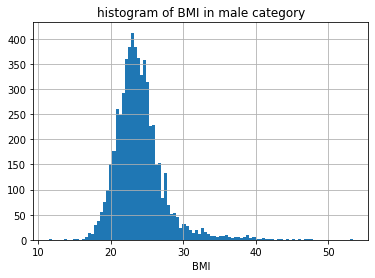

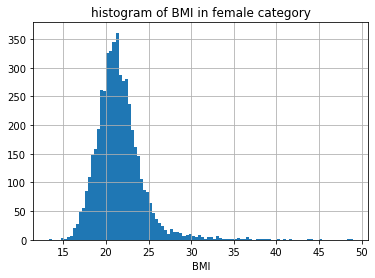

Mean of male and female of BMI:
male: 23.96
female: 21.58

STD of male and female of BMI:
male: 3.41
female: 2.93

Confidence interval for male: 23.88 < mean < 24.05
Confidence interval for female: 21.51 < mean < 21.66

Confidence interval do not overlap between categories


In [12]:
plt.hist(df_athletes['BMI'][df_athletes['sex']== 'male'], 100)
plt.xlabel('BMI')
plt.grid()
plt.title('histogram of BMI in male category')
plt.show()

plt.hist(df_athletes['BMI'][df_athletes['sex']== 'female'], 100)
plt.xlabel('BMI')
plt.grid()

plt.title('histogram of BMI in female category')
plt.show()

print('Mean of male and female of BMI:')
a = df_athletes.groupby(['sex']).mean().iloc[:,6]
print(f'male: {a[1]:.2f}')
print(f'female: {a[0]:.2f}')
print('')

print('STD of male and female of BMI:')
b = df_athletes.groupby(['sex']).std().iloc[:,6]
print(f'male: {b[1]:.2f}')
print(f'female: {b[0]:.2f}')
print('')

n1 = len(df_athletes[df_athletes['sex'] == 'male'])
# ('Z* = 1.96')
Z = 1.96
minimal  = a[1] - Z*((b[1])/np.sqrt(n1))
maximal  = a[1] + Z*((b[1])/np.sqrt(n1))
print(f'Confidence interval for male: {minimal:.2f} < mean < {maximal:.2f}')

n0 = (len(df_athletes[df_athletes['sex'] == 'female']))
minimal  = a[0] - Z*((b[0])/np.sqrt(n0))
maximal  = a[0] + Z*((b[0])/np.sqrt(n0))
print(f'Confidence interval for female: {minimal:.2f} < mean < {maximal:.2f}')
print('')
print('Confidence interval do not overlap between categories')

#### Q2

##### a

H0: miu_1 - miu_2 = 0

H1: miu_1 - miu_2 != 0


##### b
assumptions for t-test:
1. The samples are normally distributed (by the histograms)
2. The values of Variance are known and differ from each other
3. Independent Samples


##### c:    t-test

In [13]:
a = df_athletes.groupby(['sex']).mean().iloc[:,6]
b = df_athletes.groupby(['sex']).std().iloc[:,6]
n1 = len(df_athletes[df_athletes['sex'] == 'male'])
n0 = len(df_athletes[df_athletes['sex'] == 'male'])
t = (a[1]-a[0])/np.sqrt((b[0]/np.sqrt(n0))**2 + (b[1]/np.sqrt(n1))**2)
print(f'The value of t is {t:.2f}')
print(f'beacuse t={t:.2f} > 1.96 we reject the H_O')

The value of t is 42.13
beacuse t=42.13 > 1.96 we reject the H_O


##### d:    wald test

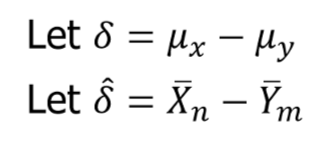


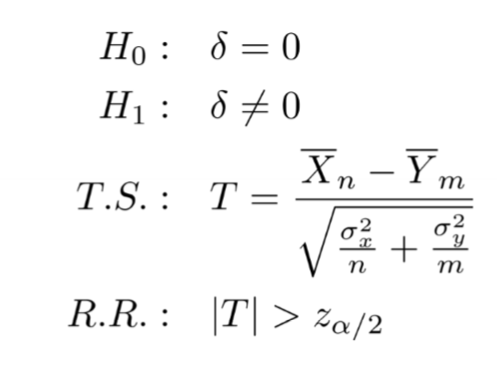

In [14]:
a = df_athletes.groupby(['sex']).mean().iloc[:,6]
b = df_athletes.groupby(['sex']).std().iloc[:,6]
n1 = len(df_athletes[df_athletes['sex'] == 'male'])
n0 = len(df_athletes[df_athletes['sex'] == 'male'])
t = (-a[1]+a[0])/np.sqrt((b[0]/np.sqrt(n0))**2 + (b[1]/np.sqrt(n1))**2)
print(f'The value of W is {t:.2f}')
print(f'beacuse W={t:.2f} > 1.96 we reject the H_O')

The value of W is -42.13
beacuse W=-42.13 > 1.96 we reject the H_O


##### e: p-value

In [15]:
a = df_athletes.groupby(['sex']).mean().iloc[:,6]
b = df_athletes.groupby(['sex']).std().iloc[:,6]
n1 = len(df_athletes[df_athletes['sex'] == 'male'])
n0 = len(df_athletes[df_athletes['sex'] == 'female'])
t = (-a[1]+a[0])/np.sqrt((b[0]/np.sqrt(n0))**2 + (b[1]/np.sqrt(n1))**2)
p_value = stat.norm.cdf(t)
print(f'The P-value lower than 0.001, so we can reject H0 in any level of significancec')

The P-value lower than 0.001, so we can reject H0 in any level of significancec


In both tests (t & wald) similar values were obtained,

because in t-test starting from relatively large sample towers (as in the case here - 5,000 or more per class),

then the distribution is normal

# Q3

During the sampling we saw that each sample contains at least one sample from each category

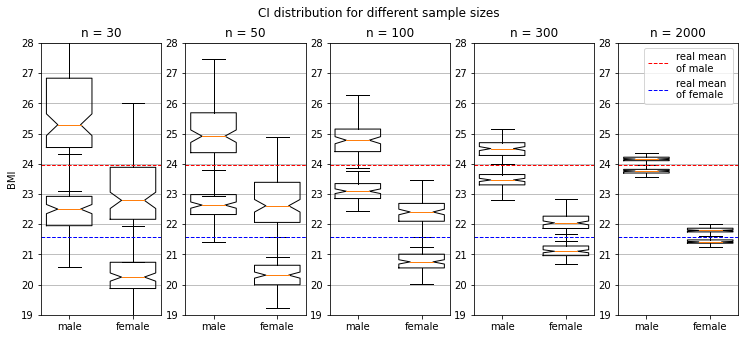

The top boxplot in each sub-figure is the CI upper boundary distribution, and the lower boxspot is the CI lower boundary distribution


In [16]:
def confidence_interval(n):
    results = np.zeros([100,4])
    for i in range(100):
        again = True
        while (again == True):
            a = np.random.choice(len(df_athletes), n, replace=False)
            df = df_athletes.iloc[a,:]
            if len(set(df['sex'] == 'female')) == 1: 
                again = True
                print(again)
            else: again = False
        a = df.groupby(['sex']).mean().iloc[:,6]
        b = df.groupby(['sex']).std().iloc[:,6]
        n1 = len(df[df['sex'] == 'male'])
        n0 = len(df[df['sex'] == 'female'])
        Z = 1.96
        minimal_male  = a[1] - Z*((b[1])/np.sqrt(n1))
        maximal_male  = a[1] + Z*((b[1])/np.sqrt(n1))
        minimal_female  = a[0] - Z*((b[0])/np.sqrt(n0))
        maximal_female  = a[0] + Z*((b[0])/np.sqrt(n0))
        results[i,:] = [minimal_male,maximal_male,minimal_female,maximal_female]
        #     print(f'Confidence interval for male: {minimal_male:.2f} < mean < {maximal_male:.2f}; for female: {minimal_female:.2f} < mean < {maximal_female:.2f} ')
    return results
def plot_CI():
    x = np.array([0,70])
    data1 = results[:,[0,2]]
    data2 = results[:,[1,3]]
    ranges = 0
    plt.boxplot(data1,50,'',positions=x-ranges,widths=50)
    plt.boxplot(data2,50,'',positions=x+ranges,widths=50)
    plt.xticks(x,['male','female'])
    plt.gca().yaxis.grid(True)
    plt.axhline(y=a[1], color='r', linestyle='--', linewidth=1,label = 'real mean \nof male')
    plt.axhline(y=a[0], color='b', linestyle='--', linewidth=1,label = 'real mean \nof female')
    plt.title(f'n = {n}')
    plt.ylim([19,28])

count_plot = 5
plt.figure(figsize = (count_plot*2.5,5))

plt.subplot(1, count_plot, 1)

n = 30
results = confidence_interval(n)
plot_CI()
plt.ylabel('BMI')
plt.suptitle('CI distribution for different sample sizes')

plt.subplot(1, count_plot, 2)
n = 50
results = confidence_interval(n)
plot_CI()

plt.subplot(1, count_plot, 3)
n = 100
results = confidence_interval(n)
plot_CI()

plt.subplot(1, count_plot, 4)
n = 300
results = confidence_interval(n)
plot_CI()

plt.subplot(1, count_plot, 5)
n = 2000
results = confidence_interval(n)
plot_CI()
plt.legend()

plt.show()
print('The top boxplot in each sub-figure is the CI upper boundary distribution, and the lower boxspot is the CI lower boundary distribution')

<div style="text-align: right"> בכל גודל מדגם מופיעים רווחי הסמך של שתי הקטגוריות, כל רווח סמך מיוצג ע"י שני בוקספלוט. הבוקספלוט העליון מייצג את החסם העליון של רווח הסמך, והבוקספלוט התחתון מייצג את החסם התחתון של רווח הסמך. הבחירה להציג את הנתונים בבוקספלוט היא כדי לראות את התפלגות רווחי הסמך ב-100 החזרות שנעשו עבור כל גודל מדגם. הקווים האדומים והכחולים מייצגים את הממוצע של כל קטגוריה (כפי שנמצא בשאלה 1)

    -	ניתן לראות שככל שגודל המדגם עולה כך רווחי הסמך קטנים ומתקרבים לממוצע האמיתי.

    
    -	בגדלי המדגם הקטנים  (30 ו-50) ישנם פחות מ-25% מרווחי סמך הכוללים את ממוצע הקבוצה השניה.

    
    -	בשאר גדלי המדגם (100,300,2000) אין אף מדגם בו נכלל ממוצע הקבוצה השנייה ברווח הסמך

    
    -	ניתן לראות כי אין חפיפה מלאה בין רווחי הסמך של הקטגוריות השונות באף גודל מדגם.

    
    -	חפיפה חלקית מתקיימת בגדלי המדגם: 30, 50, 100. 

    
    -	לדוגמה, כאשר גודל המדגם הוא 50: יש חפיפה מלאה בין התיבה (25%-75%) של החסם התחתון של הגברים לתיבה של החסם העליון של הנשים, המשמעות היא שלכל היותר ב-75% מרווחי הסמך של שתי הקבוצות היתה חפיפה חלקית.
 </div>

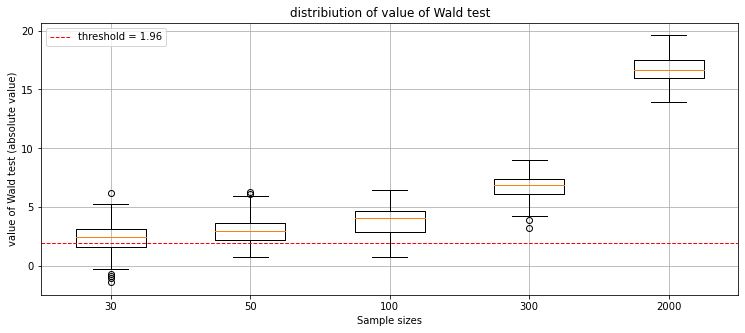

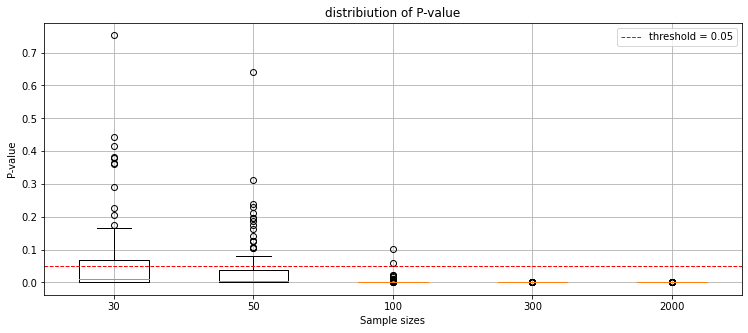

In [17]:
def wald_test(n):
    results = np.zeros([100,1])
    for i in range(100):
        again = True
        while (again == True):
            a = np.random.choice(len(df_athletes), n, replace=False)
            df = df_athletes.iloc[a,:]
            if len(set(df['sex'] == 'female')) == 1: 
                again = True
                print(again)
            else: again = False
        a = df.groupby(['sex']).mean().iloc[:,6]
        b = df.groupby(['sex']).std().iloc[:,6]
        n1 = len(df[df['sex'] == 'male'])
        n0 = len(df[df['sex'] == 'female'])
        t = (a[1]-a[0])/np.sqrt((b[0]/np.sqrt(n0))**2 + (b[1]/np.sqrt(n1))**2)

        results[i,:] = t
    return results

full_results = np.zeros([100,5])
j = 0
for i in [30,50,100,300,2000]:
    full_results[:,j] = wald_test(i)[:,0]
    j+=1
plt.figure(figsize = (12.5,5))
plt.boxplot(full_results)
plt.xticks([1,2,3,4,5],[30,50,100,300,2000])
plt.grid()
plt.xlabel('Sample sizes')
plt.ylabel('value of Wald test (absolute value)')
plt.title('distribiution of value of Wald test')
plt.axhline(y=1.96, color='r', linestyle='--',linewidth=1,label = f'threshold = 1.96')
plt.legend()
plt.show()

def wald_test_p_value(n):
    results = np.zeros([100,1])
    for i in range(100):
        again = True
        while (again == True):
            a = np.random.choice(len(df_athletes), n, replace=False)
            df = df_athletes.iloc[a,:]
            if len(set(df['sex'] == 'female')) == 1: 
                again = True
                print(again)
            else: again = False
        a = df.groupby(['sex']).mean().iloc[:,6]
        b = df.groupby(['sex']).std().iloc[:,6]
        n1 = len(df[df['sex'] == 'male'])
        n0 = len(df[df['sex'] == 'female'])
        t = (a[1]-a[0])/np.sqrt((b[0]/np.sqrt(n0))**2 + (b[1]/np.sqrt(n1))**2)
        p_value = stat.norm.cdf(-t)
        results[i,:] = p_value
    return results

full_results = np.zeros([100,5])
j = 0
for i in [30,50,100,300,2000]:
    full_results[:,j] = wald_test_p_value(i)[:,0]
    j+=1
plt.figure(figsize = (12.5,5))

plt.boxplot(full_results)
plt.xticks([1,2,3,4,5],[30,50,100,300,2000])
plt.grid()
plt.xlabel('Sample sizes')
plt.ylabel('P-value')
plt.title('distribiution of P-value')
plt.axhline(y=0.05, color='r', linestyle='--',linewidth=1,label = 'threshold = 0.05')
plt.legend()
# plt.yscale('log')
plt.show()

##### מסקנות מאיור התפלגות מבחן וולד
1. ניתן לראות שככל שגודל הדגימה עולה כך ערך הסטטיסטי נהיה גדול יותר > המובהקות הסטטיסטית גדולה יותר 
2. בגודל מדגם של 30 כ-30% מהמדגמים קיבלו ערך של סטטיסטי שלא מאפשר לדחות את השערת ה-0
3. בגודל מדגם של 50-100 כ-10-20% מהמדגמים קיבלו ערך סטטיסיטי שלא מאפשר לדחות את השערת ה-0
4. בגדלי המדגם הגדולים יותר כל דגימה אפשרה לדחות את השערת ה-0


מגמות דומות ניתן לראות בגרף המתאר את התפלגות

P-value


## Part 3


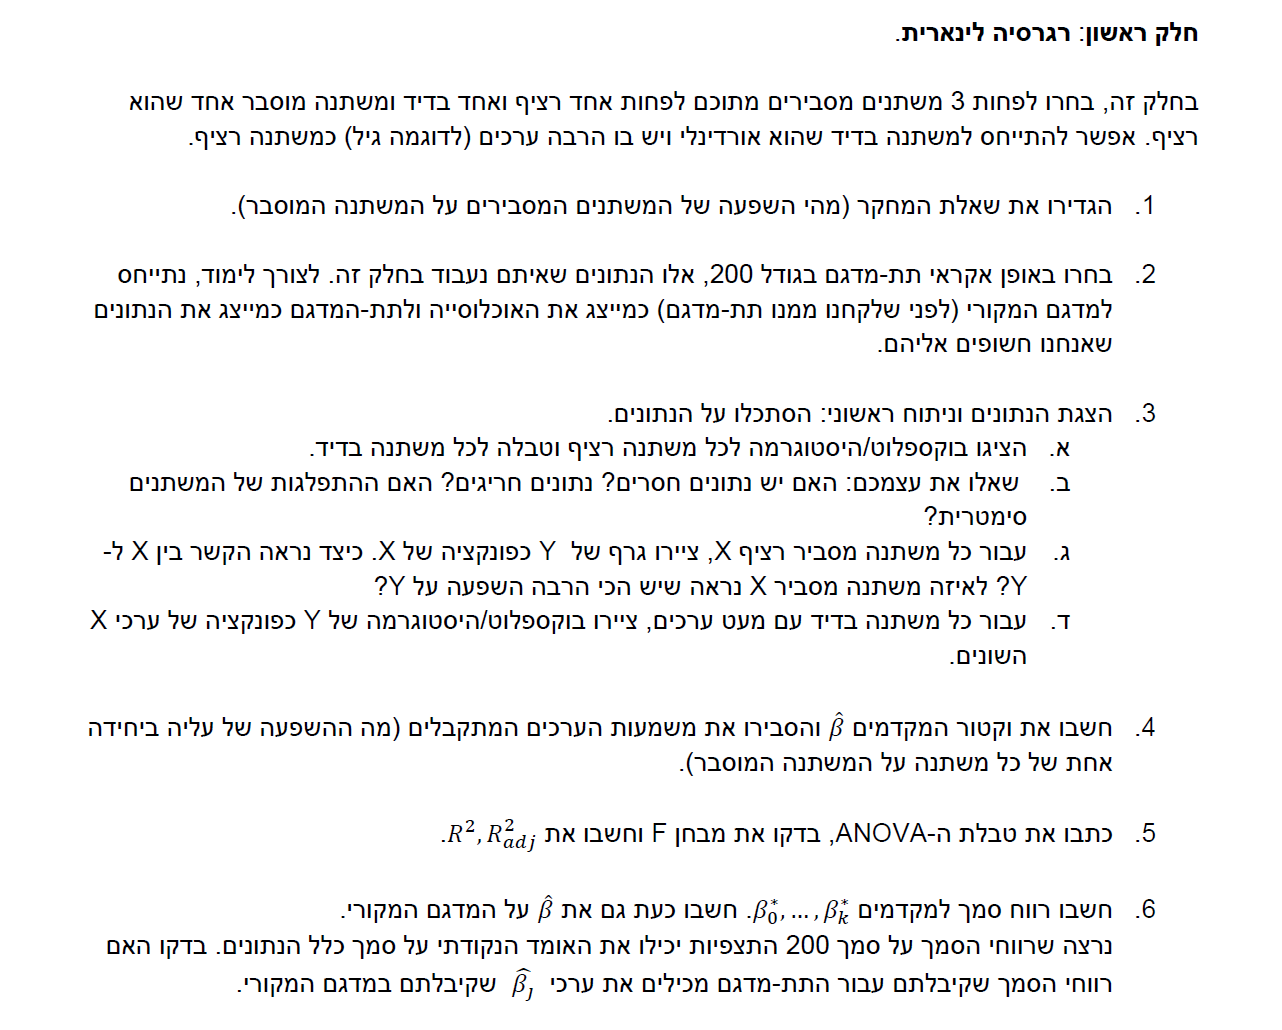

שאלת המחקר:

איך משפיעים המשתנים המסבירים: ענף ספורט, מין הספורטאי, משקל הספורטאי

על המשתנה המוסבר: גובה הספורטאי


In [18]:
df_athletes

,nationality,sex,height,weight,sport,gold,silver,bronze,if_medal,BMI
0,ESP,male,1.72,64.0,athletics,0,0,0,False,21.633315
1,KOR,female,1.68,56.0,fencing,0,0,0,False,19.841270
2,CAN,male,1.98,79.0,athletics,0,0,1,True,20.151005
3,MDA,male,1.83,80.0,taekwondo,0,0,0,False,23.888441
4,NZL,male,1.81,71.0,cycling,0,0,0,False,21.672110
...,...,...,...,...,...,...,...,...,...,...
11533,CUB,female,1.64,58.0,athletics,0,0,0,False,21.564545
11534,CZE,female,1.73,63.0,athletics,0,0,0,False,21.049818
11535,CHN,male,1.85,100.0,wrestling,0,0,0,False,29.218408
11536,VIE,male,1.60,56.0,weightlifting,0,0,0,False,21.875000


In [19]:
n = 200
seed = 98789
np.random.seed(seed)
a = np.random.choice(len(df_athletes), n, replace=False)
sel = [1,2,3,4]
df = df_athletes.iloc[a,sel]
print(df.count())

sex       200
height    198
weight    193
sport     200
dtype: int64


סקירת המדגם:
ישנם מספר ערכים חסרים במשתנה הגובה והמשקל, ההתמודדות עם עובדה זו תהיה בהוצאת הדגימות עם הערכים החסרים מהמדגם.


In [20]:
df.drop(df.index[df.isnull().any(axis=1)],0, inplace=True)
print(df.count())

sex       193
height    193
weight    193
sport     193
dtype: int64


plots for sample:


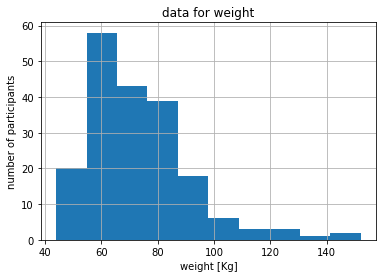

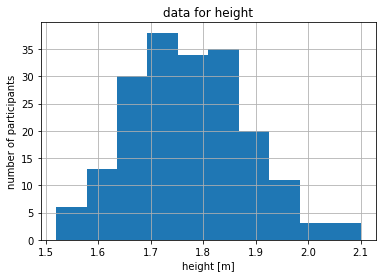

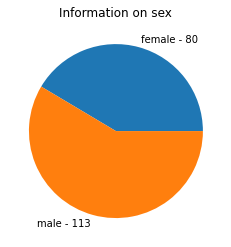

plots for population:


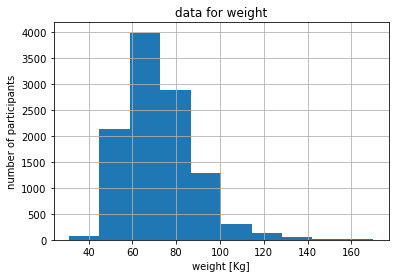

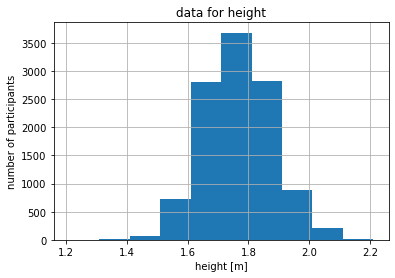

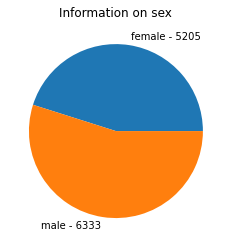

In [21]:
print('plots for sample:')
plt.hist(df['weight']);
plt.xlabel('weight [Kg]')
plt.ylabel('number of participants')
plt.title('data for weight')
plt.grid()
plt.show()



plt.hist(df['height']);
plt.xlabel('height [m]')
plt.ylabel('number of participants')
plt.title('data for height')
plt.grid()
plt.show()

no = int(len(df[df['sex'] == 'male']))
yes = int(len(df[df['sex'] == 'female']))
plt.pie([yes, no], labels = [f'female - {yes}' , f'male - {no}']);
plt.title('Information on sex');
plt.show()

print('plots for population:')
plt.hist(df_athletes['weight']);
plt.xlabel('weight [Kg]')
plt.ylabel('number of participants')
plt.title('data for weight')
plt.grid()
plt.show()



plt.hist(df_athletes['height']);
plt.xlabel('height [m]')
plt.ylabel('number of participants')
plt.title('data for height')
plt.grid()
plt.show()

no = int(len(df_athletes[df_athletes['sex'] == 'male']))
yes = int(len(df_athletes[df_athletes['sex'] == 'female']))
plt.pie([yes, no], labels = [f'female - {yes}' , f'male - {no}']);
plt.title('Information on sex');
plt.show()




אפשר לראות שהתפלגות המשקל נוטה כלפי מטה ( יש פחות ספורטאים ששוקלים יותר)

כמו כן, התפלגות המשקל במדגם דומה הלתפלגות המשקל באוכלוסייה

אפשר לראות שהתפלגות הגובה יחסית נורמלית
ודומה להתפלגות הגובה באוכלוסיייה

אפשר לראות שגם במדגם וגם באולוסייה יש יותר גברים מנשים



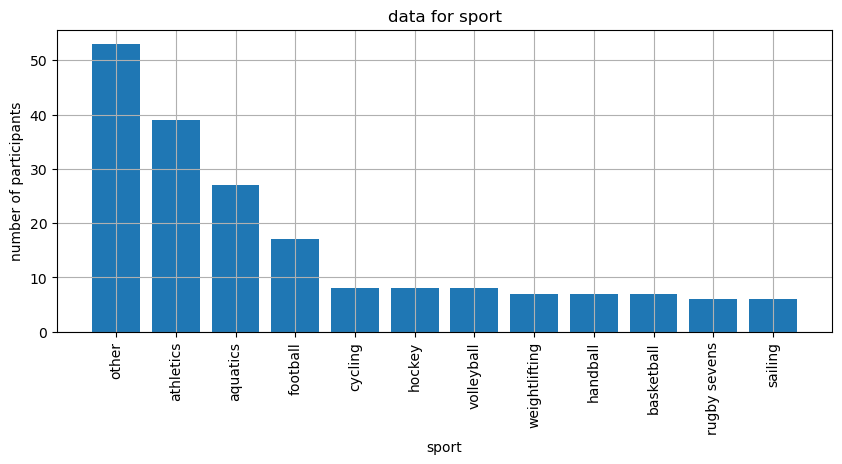

In [22]:
n = 11
labels = df['sport'].value_counts()[:n].index.tolist()
count = df['sport'].value_counts()[:n].tolist()

for i in range(len(df)):
    if labels.count(df['sport'].iloc[i]) == 0:
        df['sport'].iloc[i] = 'other'
        
labels = df['sport'].value_counts()[:n+1].index.tolist()
count = df['sport'].value_counts()[:n+1].tolist()

plt.figure(figsize=(10,4), dpi = 100)    

plt.bar(labels, count)
plt.xticks(rotation='vertical')

plt.xlabel('sport')
plt.ylabel('number of participants')
plt.title('data for sport')
plt.grid()
plt.show()


בגלל שאחד המשתנים המסבירים הוא ענף הספורט של הספורטאי
בדקתי את מס' הקטגוריות במשתנה.

נמצא כי ישנם 23 קטגוריות, נראה לי הגיוני לא לפצל את המשתנה לכל כך הרבה קטגוריות אלא לקחת את המרכזיות יותר

בחרתי לקחת את 11 המרכזיות

בערך 20% מהספורטאים התחרו באתליטקה, בערך 15% מהספורטאים התחרו בשחייה, בערך 10% מהספורטאים התחרו בכדורגל

בערך 30% מהפורטאים התחרו בקטגוריה שלא נמצאת ב-11 המקטגוריות המרכזיות

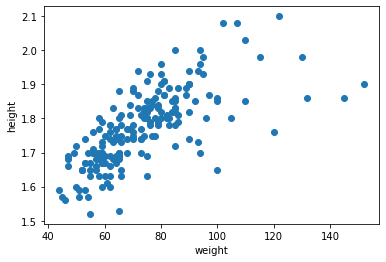

In [23]:
plt.scatter(df.weight,df.height)
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

נראה שיש קשר לינארי בין המשתנה המסביר הרציף - משקל למשתנה המוסבר - גובה

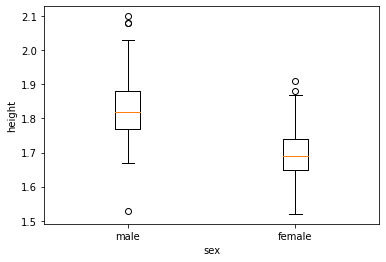

In [24]:
male = df.height[df.sex == 'male']
female = df.height[df.sex == 'female']
plt.boxplot([male,female])
plt.xlabel('sex')
plt.xticks([1,2],['male', 'female'])
plt.ylabel('height')

plt.show()

נראב כי יש השפעה משמעותית למין הספורטאי על הגובה שלו

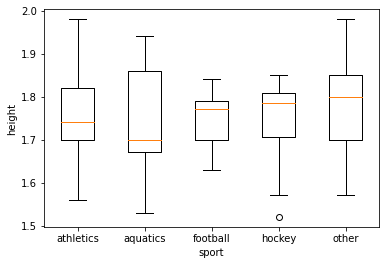

In [25]:
athletics = df.height[df.sport == 'athletics']
aquatics = df.height[df.sport == 'aquatics']
football = df.height[df.sport == 'football']
hockey = df.height[df.sport == 'hockey']
other = df.height[df.sport == 'other']
plt.boxplot([athletics,  aquatics,  football,  hockey,  other])
plt.xlabel('sport')
plt.xticks([1,2,3,4,5],['athletics',
  'aquatics',
  'football',
  'hockey',
  'other'])
plt.ylabel('height')
plt.show()

נראה בממוצע ספורטאים המתחרים בשחייה נמוכים יותר

נראה כי השונות בגובה בספורטאים המתחרים באתלטיקה היא הגדולה ביותר



#### ביצוע רגרסיה ליניארית

In [26]:
sel = [1,2,3,4]
df = df_athletes.iloc[a,sel]
n = 11
labels = df['sport'].value_counts()[:n].index.tolist()
count = df['sport'].value_counts()[:n].tolist()

for i in range(len(df)):
    if labels.count(df['sport'].iloc[i]) == 0:
        df['sport'].iloc[i] = 'other'
        
labels = df['sport'].value_counts()[:n].index.tolist()
# for i in range(len(df)):
#     if labels.count(df['sport'].iloc[i]) == 0:
#         df['sport'].iloc[i] = 'other'
df.drop(df.index[df.isnull().any(axis=1)],0, inplace=True)
sport = pd.get_dummies(df.sport)
sex = pd.get_dummies(df.sex)
df_d = pd.concat([df.height,df.weight,sex, sport], axis=1)

labels.append( 'weight')
labels.append( 'male')

sel = labels[1:]
df_x = df_d.loc[:,sel]
Y = np.array(df_d.height)
X = np.array(df_x)
X = np.concatenate([np.ones([(X.shape[0]),1]),X], axis = 1)

XT_dot_X = np.matmul(X.transpose(), X) # X*X_T
XT_dot_X_inv = np.linalg.inv(XT_dot_X)

beta_kova = np.matmul(np.matmul(XT_dot_X_inv, X.transpose()), Y) 
Y_mean = sum(Y)/len(Y)
SST = sum([(t-Y_mean)**2 for t in Y])
Y_hat = np.dot(X, beta_kova)
e = np.subtract(Y,Y_hat)
Y_hat_200 = Y_hat
e_200 = e
SS_res = sum([k**2 for k in e])
n = len(Y)
MS_res = SS_res/(n-X.shape[1]-1)

data = pd.DataFrame(columns= ['SS','df','MS', 'F_ratio', 'P_value'], index=['Reg', 'Res', 'Total'])
data.SS[2] = SST
data.SS[1] = SS_res
data.SS[0] = SST - SS_res
data.df = [X.shape[1], X.shape[0]-X.shape[1]-1,X.shape[0]-1]
data.MS = data.SS/data.df
data.loc['Reg','F_ratio'] = (data.MS['Reg']/data.MS['Res'])

R_2 = 1 - (data.SS['Res']/data.SS['Total'])
R_2_adj = 1 - (1-R_2)*((X.shape[0]-1)/(X.shape[0]-X.shape[1]-1))
F_stat = stat.f.ppf(q=1-0.05, dfn=X.shape[1], dfd=X.shape[0]-X.shape[1]-1)
p_value =  1-stat.f.cdf(data.loc['Reg','F_ratio'], dfn=X.shape[1], dfd=X.shape[0]-X.shape[1]-1)
data.loc['Reg','P_value'] = p_value
# calculate CI
CI = np.zeros([len(beta_kova[1:]),2])
CI[:,0] = beta_kova[1:]
for i in range(1, len(beta_kova)):
    CI[i-1,1] = 1.96 * data.loc['Reg','MS'] * XT_dot_X_inv[i,i]
    
    

print()
print('Numerical variable:')
print()
print(f'An increase in one unit of *{sel[-2]}* will cause to enlarge of {beta_kova[-2]:.3f} in the value of height')
print()
print('Categorial variables:')
print()
print(f'If the sex of the athlete is male, The value of the height will increase by {beta_kova[-1]:.3f}')
beta0 = beta_kova[1:-2]
for i in range(len(beta0)):
    if beta0[i] > 0:
        print(f'If the athlete competes in the *{sel[i]}*, the height value will increase by {beta0[i]:.3f}')
    if beta0[i] < 0:
        print(f'If the athlete competes in the *{sel[i]}*, the height value will decrease by {beta0[i]:.3f}')


Numerical variable:

An increase in one unit of *weight* will cause to enlarge of 0.004 in the value of height

Categorial variables:

If the sex of the athlete is male, The value of the height will increase by 0.065
If the athlete competes in the *athletics*, the height value will increase by 0.030
If the athlete competes in the *aquatics*, the height value will increase by 0.019
If the athlete competes in the *football*, the height value will increase by 0.005
If the athlete competes in the *handball*, the height value will increase by 0.009
If the athlete competes in the *cycling*, the height value will decrease by -0.025
If the athlete competes in the *hockey*, the height value will decrease by -0.039
If the athlete competes in the *volleyball*, the height value will increase by 0.123
If the athlete competes in the *weightlifting*, the height value will decrease by -0.129
If the athlete competes in the *basketball*, the height value will increase by 0.116
If the athlete competes i


מפורטים לעיל כלל ההשפעות שלשינוי בערכי המשתנים המסבירים על ערך המשתנה המוסבר

מסקנות עיקריות:

עלייה בערך המשקל בק"ג אחד תגרום לעלייה של 0.3 ס"מ בגובה

אם הספורטאי מתחרה במקצוע החתירה הגובה שלו יגדל ב- 8.1 ס"מ 

אם הספורטאי מתחרה במקצוע האתליטיקה הגובה שלו יגדל ב- 4 ס"מ 

אם הספורטאי מתחרה במקצוע החתירה הגובה שלו יגדל ב- 3 ס"מ 
 

In [27]:
print('ANOVA table:')
print(data)

ANOVA table:
             SS   df          MS  F_ratio      P_value
Reg     1.66829   13     0.12833  36.3885  1.11022e-16
Res    0.631272  179  0.00352666      NaN          NaN
Total   2.29956  192   0.0119769      NaN          NaN


#### F-test

H_0: β_1*= …= β_k*=0

H_1: β_j*≠0 for at least one j>0 

T.S is

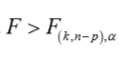

alpha = 0.05

R.R is 

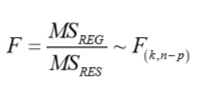


In [28]:
MS_reg_200 = data.loc['Reg','MS']
F_stat_200 = F_stat
F_ratio = data.loc['Reg','F_ratio']
print(f'R^2: {R_2:.4f}')
print(f'R^2_adj: {R_2_adj:.4f}')
print(f'F_stat: {F_stat:.4f}')
print(f'p_value: {p_value:}')

R^2: 0.7255
R^2_adj: 0.7055
F_stat: 1.7752
p_value: 1.1102230246251565e-16


ניתן לדחות את השערת האפס כי

F

גדול מ-ערך הסטטיסטי


36.9867 > 1.7752

ניתן לראות שערך 

R^2_adj

קטן במקצת מערך 

R^2

#### חישוב רווחי סמך למקדמים ובדיקתם על מקדמי האוכלוסייה

In [29]:
sel = [1,2,3,4]
df = df_athletes.iloc[a,sel]
n = 11
labels = df['sport'].value_counts()[:n].index.tolist()
count = df['sport'].value_counts()[:n].tolist()

for i in range(len(df)):
    if labels.count(df['sport'].iloc[i]) == 0:
        df['sport'].iloc[i] = 'other'
        
labels = df['sport'].value_counts()[:n].index.tolist()

#----------------

sel = [1,2,3,4]
df = df_athletes.iloc[:,sel]

for i in range(len(df)):
    if labels.count(df['sport'].iloc[i]) == 0:
        df['sport'].iloc[i] = 'other'
        
df.drop(df.index[df.isnull().any(axis=1)],0, inplace=True)
sport = pd.get_dummies(df.sport)
sex = pd.get_dummies(df.sex)
df_d = pd.concat([df.height,df.weight,sex, sport], axis=1)
labels.append( 'weight')
labels.append( 'male')

sel = labels[1:]
df_x = df_d.loc[:,sel]
Y = np.array(df_d.height)
X = np.array(df_x)
X = np.concatenate([np.ones([(X.shape[0]),1]),X], axis = 1)

XT_dot_X = np.matmul(X.transpose(), X) # X*X_T
XT_dot_X_inv = np.linalg.inv(XT_dot_X)
beta_kova = np.matmul(np.matmul(XT_dot_X_inv, X.transpose()), Y) 
Y_mean = sum(Y)/len(Y)
SST = sum([(t-Y_mean)**2 for t in Y])
Y_hat = np.dot(X, beta_kova)
e = np.subtract(Y,Y_hat)
SS_res = sum([k**2 for k in e])
n = len(Y)
MS_res = SS_res/(n-X.shape[1]-1)

data = pd.DataFrame(columns= ['SS','df','MS', 'F_ratio', 'P_value'], index=['Reg', 'Res', 'Total'])
data.SS[2] = SST
data.SS[1] = SS_res
data.SS[0] = SST - SS_res
data.df = [X.shape[1], X.shape[0]-X.shape[1]-1,X.shape[0]-1]
data.MS = data.SS/data.df
data.loc['Reg','F_ratio'] = (data.MS['Reg']/data.MS['Res'])

R_2 = 1 - (data.SS['Res']/data.SS['Total'])
R_2_adj = 1 - (1-R_2)*((X.shape[0]-1)/(X.shape[0]-X.shape[1]-1))
F_stat = stat.f.ppf(q=1-0.05, dfn=X.shape[1], dfd=X.shape[0]-X.shape[1]-1)
p_value =  1-stat.f.cdf(data.loc['Reg','F_ratio'], dfn=X.shape[1], dfd=X.shape[0]-X.shape[1]-1)
data.loc['Reg','P_value'] = p_value

# print()
# print('ANOVA table:')
# print(data)
# print()

# print(f'R^2: {R_2:.4f}')
# print(f'R^2_adj: {R_2_adj:.4f}')
# print(f'F_stat: {F_stat:.4f}')
# print(f'p_value: {p_value:}')
# print()

for i in range(1,len(beta_kova)):
    lower = CI[i-1,0] - CI[i-1,1]
    upper = CI[i-1,0] + CI[i-1,1]
    c = beta_kova[i] 
    print(f'[{lower:.5f} < {c:.5f} < {upper:.5f}] CI of {sel[i-1]}')
    if c < lower: print(f' -> beta of {sel[i-1]} is not in CI')
    if c > upper: print(f' -> beta of {sel[i-1]} is not in CI')

[0.01856 < 0.01408 < 0.04089] CI of athletics
 -> beta of athletics is not in CI
[0.00556 < 0.03145 < 0.03337] CI of aquatics
[-0.01458 < 0.00322 < 0.02395] CI of football
[-0.03132 < 0.03294 < 0.04967] CI of handball
[-0.06171 < 0.00365 < 0.01090] CI of cycling
[-0.07442 < -0.00820 < -0.00275] CI of hockey
[0.08643 < 0.10597 < 0.15934] CI of volleyball
[-0.17716 < -0.12847 < -0.08151] CI of weightlifting
[0.07214 < 0.09565 < 0.15891] CI of basketball
[-0.12005 < -0.06658 < -0.02510] CI of wrestling
[0.00360 < 0.00432 < 0.00361] CI of weight
 -> beta of weight is not in CI
[0.05709 < 0.05181 < 0.07383] CI of male
 -> beta of male is not in CI


ניתן לראות שרוב רווחי הסמך למקדמים שנמצאו במדגם מכילים את המקדמים שנמצאו באוכלוסייה

המשתנים שלגביהם אין הכלה של המקדמים ברווחי הסמך הם:

קטגוריית האתליטיקה

משקל הספורטאי

מין הספורטאי

ניתן להבין שהמקדמים עבור משתנים אלו אינם מתארים בצורה טובה את האוכלוסייה




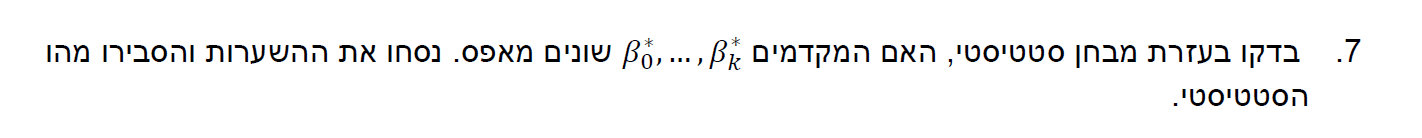

נשתמש במבחן 

t-test

בגלל שישנם יותר מ-120 דגימות אפשר לעשות קירוב לנורמלי

H_0: β_i=0

H_1: β_i≠0  

T.S: β_i/ SE(β_i)

R.R: T.S > Z_alpha = 0.05/2 -> T.S > 1.96


In [30]:
sel = [1,2,3,4]
df = df_athletes.iloc[a,sel]
n = 11
labels = df['sport'].value_counts()[:n].index.tolist()
count = df['sport'].value_counts()[:n].tolist()

for i in range(len(df)):
    if labels.count(df['sport'].iloc[i]) == 0:
        df['sport'].iloc[i] = 'other'
        
labels = df['sport'].value_counts()[:n].index.tolist()
# for i in range(len(df)):
#     if labels.count(df['sport'].iloc[i]) == 0:
#         df['sport'].iloc[i] = 'other'
df.drop(df.index[df.isnull().any(axis=1)],0, inplace=True)
sport = pd.get_dummies(df.sport)
sex = pd.get_dummies(df.sex)
df_d = pd.concat([df.height,df.weight,sex, sport], axis=1)

labels.append( 'weight')
labels.append( 'male')

sel = labels[1:]
df_x = df_d.loc[:,sel]
Y = np.array(df_d.height)
X = np.array(df_x)
X = np.concatenate([np.ones([(X.shape[0]),1]),X], axis = 1)

XT_dot_X = np.matmul(X.transpose(), X) # X*X_T
XT_dot_X_inv = np.linalg.inv(XT_dot_X)

beta_kova = np.matmul(np.matmul(XT_dot_X_inv, X.transpose()), Y) 
Y_mean = sum(Y)/len(Y)
SST = sum([(t-Y_mean)**2 for t in Y])
Y_hat = np.dot(X, beta_kova)
e = np.subtract(Y,Y_hat)
Y_hat_200 = Y_hat
e_200 = e
SS_res = sum([k**2 for k in e])
n = len(Y)
MS_res = SS_res/(n-X.shape[1]-1)

data = pd.DataFrame(columns= ['SS','df','MS', 'F_ratio', 'P_value'], index=['Reg', 'Res', 'Total'])
data.SS[2] = SST
data.SS[1] = SS_res
data.SS[0] = SST - SS_res
data.df = [X.shape[1], X.shape[0]-X.shape[1]-1,X.shape[0]-1]
data.MS = data.SS/data.df
data.loc['Reg','F_ratio'] = (data.MS['Reg']/data.MS['Res'])

R_2 = 1 - (data.SS['Res']/data.SS['Total'])
R_2_adj = 1 - (1-R_2)*((X.shape[0]-1)/(X.shape[0]-X.shape[1]-1))
F_stat = stat.f.ppf(q=1-0.05, dfn=X.shape[1], dfd=X.shape[0]-X.shape[1]-1)
p_value =  1-stat.f.cdf(data.loc['Reg','F_ratio'], dfn=X.shape[1], dfd=X.shape[0]-X.shape[1]-1)
data.loc['Reg','P_value'] = p_value

# print()
# print('ANOVA table:')
# print(data)
# print()

# print(f'R^2: {R_2:.4f}')
# print(f'R^2_adj: {R_2_adj:.4f}')
# print(f'F_stat: {F_stat:.4f}')
# print(f'p_value: {p_value:}')
# print()

MSE = data.loc['Res','MS']
for i in range(1,13):
   print(f'T.S of {sel[i-1]}: {np.abs(beta_kova[i]/(MSE*XT_dot_X_inv[i,i])):.0f}')

T.S of athletics: 190
T.S of aquatics: 100
T.S of football: 17
T.S of handball: 16
T.S of cycling: 50
T.S of hockey: 77
T.S of volleyball: 240
T.S of weightlifting: 193
T.S of basketball: 190
T.S of wrestling: 109
T.S of weight: 31660
T.S of male: 558


ניתן לראות כי השערת האפס נדחית בכל המקדמים של הרגרסיה

בכל המקדמים ערך אנו נמצאים האיזור הדחייה

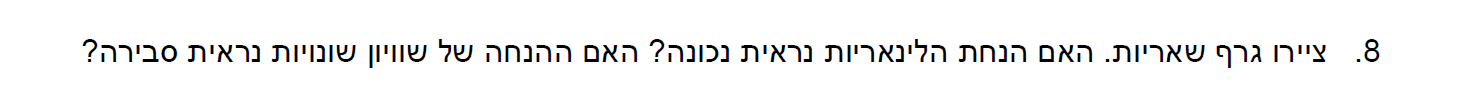

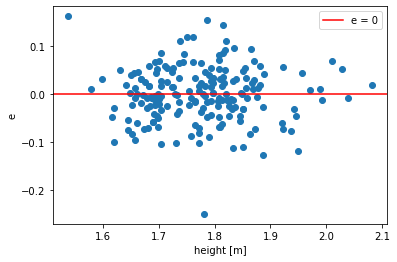

1. It can be seen in figure that the residuals are located around the line 𝑒=0
2. It can be seen in the figure that the spredibility of the residues around the 0 line is relatively uniform


In [31]:
plt.scatter(Y_hat_200, e_200)
plt.axhline(y=0 , label='e = 0', color = 'r')
xc = 0
c = ['r']
# plt.axhline(y=xc, label='line at x = {}'.format(xc))
plt.legend()
plt.ylabel('e')
plt.xlabel('height [m]')
plt.show()
print('1. It can be seen in figure that the residuals are located around the line 𝑒=0')
print('2. It can be seen in the figure that the spredibility of the residues around the 0 line is relatively uniform')


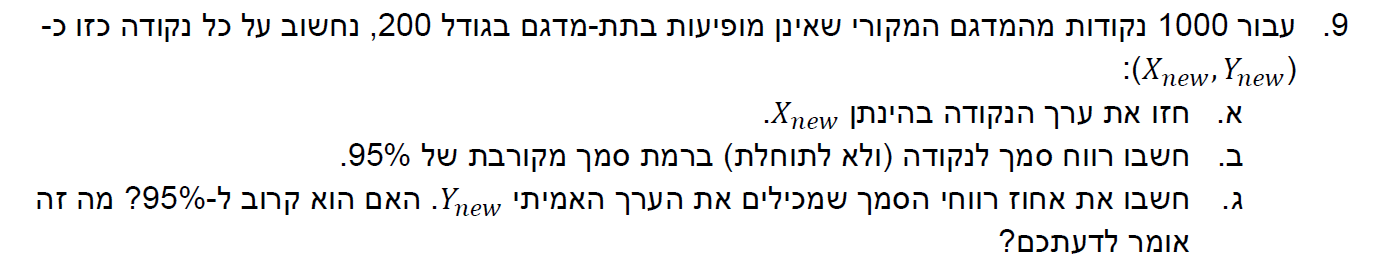

In [32]:
sel = [1,2,3,4]
# n = 200
# a = np.random.choice(len(df_athletes), n, replace=False)
df = df_athletes.iloc[a,sel]
# labels = df['sport'].value_counts()[:].index.tolist()
n = 11
labels = df['sport'].value_counts()[:n].index.tolist()
count = df['sport'].value_counts()[:n].tolist()

for i in range(len(df)):
    if labels.count(df['sport'].iloc[i]) == 0:
        df['sport'].iloc[i] = 'other'
        
labels = df['sport'].value_counts()[:n].index.tolist()
# for i in range(len(df)):
#     if labels.count(df['sport'].iloc[i]) == 0:
#         df['sport'].iloc[i] = 'other'
df.drop(df.index[df.isnull().any(axis=1)],0, inplace=True)
sport = pd.get_dummies(df.sport)
sex = pd.get_dummies(df.sex)
df_d = pd.concat([df.height,df.weight,sex, sport], axis=1)

labels.append( 'weight')
labels.append( 'male')

sel = labels[1:]
df_x = df_d.loc[:,sel]
Y = np.array(df_d.height)
X = np.array(df_x)
X = np.concatenate([np.ones([(X.shape[0]),1]),X], axis = 1)

XT_dot_X = np.matmul(X.transpose(), X) # X*X_T
XT_dot_X_inv = np.linalg.inv(XT_dot_X)

beta_kova = np.matmul(np.matmul(XT_dot_X_inv, X.transpose()), Y) 
Y_mean = sum(Y)/len(Y)
SST = sum([(t-Y_mean)**2 for t in Y])
Y_hat = np.dot(X, beta_kova)
e = np.subtract(Y,Y_hat)
Y_hat_200 = Y_hat
e_200 = e
SS_res = sum([k**2 for k in e])
n = len(Y)
MS_res = SS_res/(n-X.shape[1]-1)

data = pd.DataFrame(columns= ['SS','df','MS', 'F_ratio', 'P_value'], index=['Reg', 'Res', 'Total'])
data.SS[2] = SST
data.SS[1] = SS_res
data.SS[0] = SST - SS_res
data.df = [X.shape[1], X.shape[0]-X.shape[1]-1,X.shape[0]-1]
data.MS = data.SS/data.df
data.loc['Reg','F_ratio'] = (data.MS['Reg']/data.MS['Res'])

R_2 = 1 - (data.SS['Res']/data.SS['Total'])
R_2_adj = 1 - (1-R_2)*((X.shape[0]-1)/(X.shape[0]-X.shape[1]-1))
F_stat = stat.f.ppf(q=1-0.05, dfn=X.shape[1], dfd=X.shape[0]-X.shape[1]-1)
p_value =  1-stat.f.cdf(data.loc['Reg','F_ratio'], dfn=X.shape[1], dfd=X.shape[0]-X.shape[1]-1)
data.loc['Reg','P_value'] = p_value



In [33]:
n = 200
np.random.seed(seed)
a = np.random.choice(len(df_athletes), n, replace=False)
b = list(df_athletes.index)
for i in a: b.remove(i)

n = 1000
np.random.seed(seed)
a1 = np.random.choice(b, n, replace=False)
sel = [1,2,3,4]
df1 = df_athletes.iloc[a1,sel]
# print(df1.count())
df1.drop(df1.index[df1.isnull().any(axis=1)],0, inplace=True)
# print(df1.count())

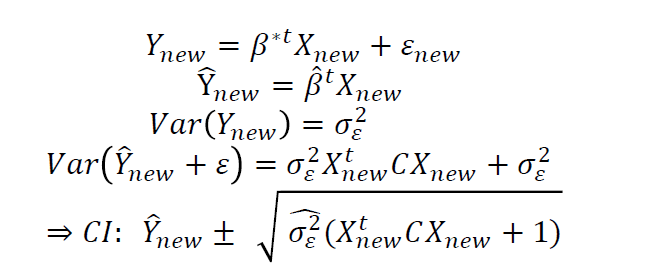

In [34]:
sel = [1,2,3,4]
df = df_athletes.iloc[a,sel]
n = 11
labels = df['sport'].value_counts()[:n].index.tolist()
count = df['sport'].value_counts()[:n].tolist()

for i in range(len(df)):
    if labels.count(df['sport'].iloc[i]) == 0:
        df['sport'].iloc[i] = 'other'
        
labels = df['sport'].value_counts()[:n].index.tolist()

#----------------

sel = [1,2,3,4]
df = df1

for i in range(len(df)):
    if labels.count(df['sport'].iloc[i]) == 0:
        df['sport'].iloc[i] = 'other'
        
df.drop(df.index[df.isnull().any(axis=1)],0, inplace=True)
sport = pd.get_dummies(df.sport)
sex = pd.get_dummies(df.sex)
df_d = pd.concat([df.height,df.weight,sex, sport], axis=1)
labels.append( 'weight')
labels.append( 'male')

sel = labels[1:]
df_x = df_d.loc[:,sel]
Y = np.array(df_d.height)
X = np.array(df_x)
X = np.concatenate([np.ones([(X.shape[0]),1]),X], axis = 1)

Y_hat = np.dot(X, beta_kova)
CI = np.zeros([len(Y_hat),2])
C = XT_dot_X_inv
counter = 0
for i in range(len(Y_hat)):
    x = X[i,:]
    ci = 1.96*((data.loc['Res','MS']*(1 + x @ C @ x.T)) ** 0.5)
    CI[i,0] = Y_hat[i] - ci
    CI[i,1] = Y_hat[i] + ci
    c = Y[i] 
    if c < CI[i,0]: 
        counter += 1
#         print(i)
    if c > CI[i,1]: 
        counter += 1
print(f'Percentage of points entered within a confidence interval: {100*(1-counter/len(Y_hat)):.1f}%')

Percentage of points entered within a confidence interval: 94.7%


הערך שהתקבל הגיוני כי ביצענו רווח סמך לתחזית עבור 95% והתקבל ערך יחסית קרוב

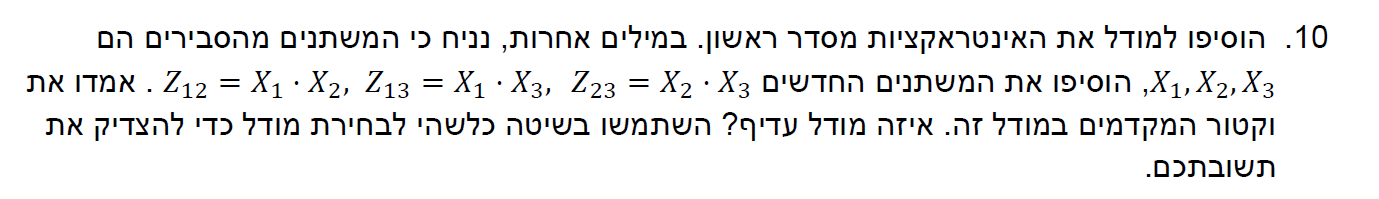

In [35]:
sel = [1,2,3,4]
# n = 200
# a = np.random.choice(len(df_athletes), n, replace=False)
df = df_athletes.iloc[a,sel]
# labels = df['sport'].value_counts()[:].index.tolist()
n = 11
labels = df['sport'].value_counts()[:n].index.tolist()
count = df['sport'].value_counts()[:n].tolist()

for i in range(len(df)):
    if labels.count(df['sport'].iloc[i]) == 0:
        df['sport'].iloc[i] = 'other'
        
labels = df['sport'].value_counts()[:n].index.tolist()
# for i in range(len(df)):
#     if labels.count(df['sport'].iloc[i]) == 0:
#         df['sport'].iloc[i] = 'other'
df.drop(df.index[df.isnull().any(axis=1)],0, inplace=True)
sport = pd.get_dummies(df.sport)
sex = pd.get_dummies(df.sex)
df_d = pd.concat([df.height,df.weight,sex, sport], axis=1)

labels.append( 'weight')
labels.append( 'male')

sel = labels[1:]
df_x = df_d.loc[:,sel]
Y = np.array(df_d.height)
X = np.array(df_x)
X = np.concatenate([np.ones([(X.shape[0]),1]),X], axis = 1)

XT_dot_X = np.matmul(X.transpose(), X) # X*X_T
XT_dot_X_inv = np.linalg.inv(XT_dot_X)

beta_kova = np.matmul(np.matmul(XT_dot_X_inv, X.transpose()), Y) 
Y_mean = sum(Y)/len(Y)
SST = sum([(t-Y_mean)**2 for t in Y])
Y_hat = np.dot(X, beta_kova)
e = np.subtract(Y,Y_hat)
Y_hat_200 = Y_hat
e_200 = e
SS_res = sum([k**2 for k in e])
n = len(Y)
MS_res = SS_res/(n-X.shape[1]-1)

data = pd.DataFrame(columns= ['SS','df','MS', 'F_ratio', 'P_value'], index=['Reg', 'Res', 'Total'])
data.SS[2] = SST
data.SS[1] = SS_res
data.SS[0] = SST - SS_res
data.df = [X.shape[1], X.shape[0]-X.shape[1]-1,X.shape[0]-1]
data.MS = data.SS/data.df
data.loc['Reg','F_ratio'] = (data.MS['Reg']/data.MS['Res'])

R_2 = 1 - (data.SS['Res']/data.SS['Total'])
R_2_adj = 1 - (1-R_2)*((X.shape[0]-1)/(X.shape[0]-X.shape[1]-1))
F_stat = stat.f.ppf(q=1-0.05, dfn=X.shape[1], dfd=X.shape[0]-X.shape[1]-1)
p_value =  1-stat.f.cdf(data.loc['Reg','F_ratio'], dfn=X.shape[1], dfd=X.shape[0]-X.shape[1]-1)
data.loc['Reg','P_value'] = p_value
BIC_0 = n*math.log(data.loc['Res','MS'])+data.df['Reg']*math.log(n)

In [36]:
sel = [1,2,3,4]
# n = 200
# a = np.random.choice(len(df_athletes), n, replace=False)
df = df_athletes.iloc[a,sel]
# labels = df['sport'].value_counts()[:].index.tolist()
n = 11
labels = df['sport'].value_counts()[:n].index.tolist()
count = df['sport'].value_counts()[:n].tolist()

for i in range(len(df)):
    if labels.count(df['sport'].iloc[i]) == 0:
        df['sport'].iloc[i] = 'other'
        
labels = df['sport'].value_counts()[:n].index.tolist()
# for i in range(len(df)):
#     if labels.count(df['sport'].iloc[i]) == 0:
#         df['sport'].iloc[i] = 'other'
df.drop(df.index[df.isnull().any(axis=1)],0, inplace=True)
sport = pd.get_dummies(df.sport)
sex = pd.get_dummies(df.sex)
df_d = pd.concat([df.height,df.weight,sex, sport], axis=1)

labels.append( 'weight')
labels.append( 'male')

sel = labels[1:]
df_x = df_d.loc[:,sel]

df_x[f'weight_male'] = df_x.weight*df_x.male

for i in sel[:-2]:
    df_x[f'weight_{i}'] = df_x.weight*df_x[i]    
    df_x[f'male_{i}'] = df_x.male*df_x[i]

Y = np.array(df_d.height)
X = np.array(df_x)
X = np.concatenate([np.ones([(X.shape[0]),1]),X], axis = 1)


regressor = LinearRegression()
regressor.fit(X,Y)
Y_hat = regressor.predict(X)
beta_kova = regressor.coef_
Y_mean = sum(Y)/len(Y)
SST = sum([(t-Y_mean)**2 for t in Y])
e = np.subtract(Y,Y_hat)
SS_res = sum([k**2 for k in e])
n = len(Y)
MS_res = SS_res/(n-X.shape[1]-1)

data = pd.DataFrame(columns= ['SS','df','MS', 'F_ratio', 'P_value'], index=['Reg', 'Res', 'Total'])
data.SS[2] = SST
data.SS[1] = SS_res
data.SS[0] = SST - SS_res
data.df = [X.shape[1], X.shape[0]-X.shape[1]-1,X.shape[0]-1]
data.MS = data.SS/data.df
data.loc['Reg','F_ratio'] = (data.MS['Reg']/data.MS['Res'])


R_2 = 1 - (data.SS['Res']/data.SS['Total'])
R_2_adj = 1 - (1-R_2)*((X.shape[0]-1)/(X.shape[0]-X.shape[1]-1))
F_stat = stat.f.ppf(q=1-0.05, dfn=X.shape[1], dfd=X.shape[0]-X.shape[1]-1)
p_value =  1-stat.f.cdf(data.loc['Reg','F_ratio'], dfn=X.shape[1], dfd=X.shape[0]-X.shape[1]-1)
data.loc['Reg','P_value'] = p_value


BIC_1 = n*math.log(data.loc['Res','MS'])+data.df['Reg']*math.log(n)

for i in range(1, len(beta_kova)):
#    print(f'T.S of {sel[i-1]}: {np.abs(beta_kova[i]/(MSE*XT_dot_X_inv[i,i])):.0f}')
#     if np.abs(beta_kova[i]) > 0.0001:
        print(f'the beta of {df_x.columns[i-1]} is {beta_kova[i]:.5f}')
print()
print('ANOVA table:')
print(data)
print()

print(f'R^2: {R_2:.4f}')
print(f'R^2_adj: {R_2_adj:.4f}')
print(f'F_stat: {F_stat:.4f}')
print(f'p_value: {p_value:}')
print()
print(BIC_0, BIC_1)


the beta of athletics is -0.06618
the beta of aquatics is -0.27787
the beta of football is -0.14738
the beta of handball is -0.28435
the beta of cycling is 0.17480
the beta of hockey is -0.23523
the beta of volleyball is -0.09110
the beta of weightlifting is 0.01914
the beta of basketball is -0.18522
the beta of wrestling is -0.08555
the beta of weight is 0.00304
the beta of male is 0.10852
the beta of weight_male is -0.00025
the beta of weight_athletics is 0.00186
the beta of male_athletics is -0.05727
the beta of weight_aquatics is 0.00512
the beta of male_aquatics is -0.11230
the beta of weight_football is 0.00286
the beta of male_football is -0.08095
the beta of weight_handball is 0.00537
the beta of male_handball is -0.19156
the beta of weight_cycling is -0.00304
the beta of male_cycling is -0.01083
the beta of weight_hockey is 0.00231
the beta of male_hockey is 0.03189
the beta of weight_volleyball is 0.00310
the beta of male_volleyball is -0.05582
the beta of weight_weightliftin

נבדק מדד ה 

BIC

עבור שני המודלים

נמצא כי עבור המודל המקורי (המצומצם) התקבל ערך נמוך יותר (-1017) לעומת הערך שהתקבל עבור המודל המורחב (-919)

מסיבה זו יש להמליץ על בחירת המודל המורחב

בנוסף, נמצא כי ה

R^2_adj

גבוה יותר במודל המורחב (0.71) לעומת המודל המקורי (0.69)

ולכן גם, כדאי לבחור במודל המורחב

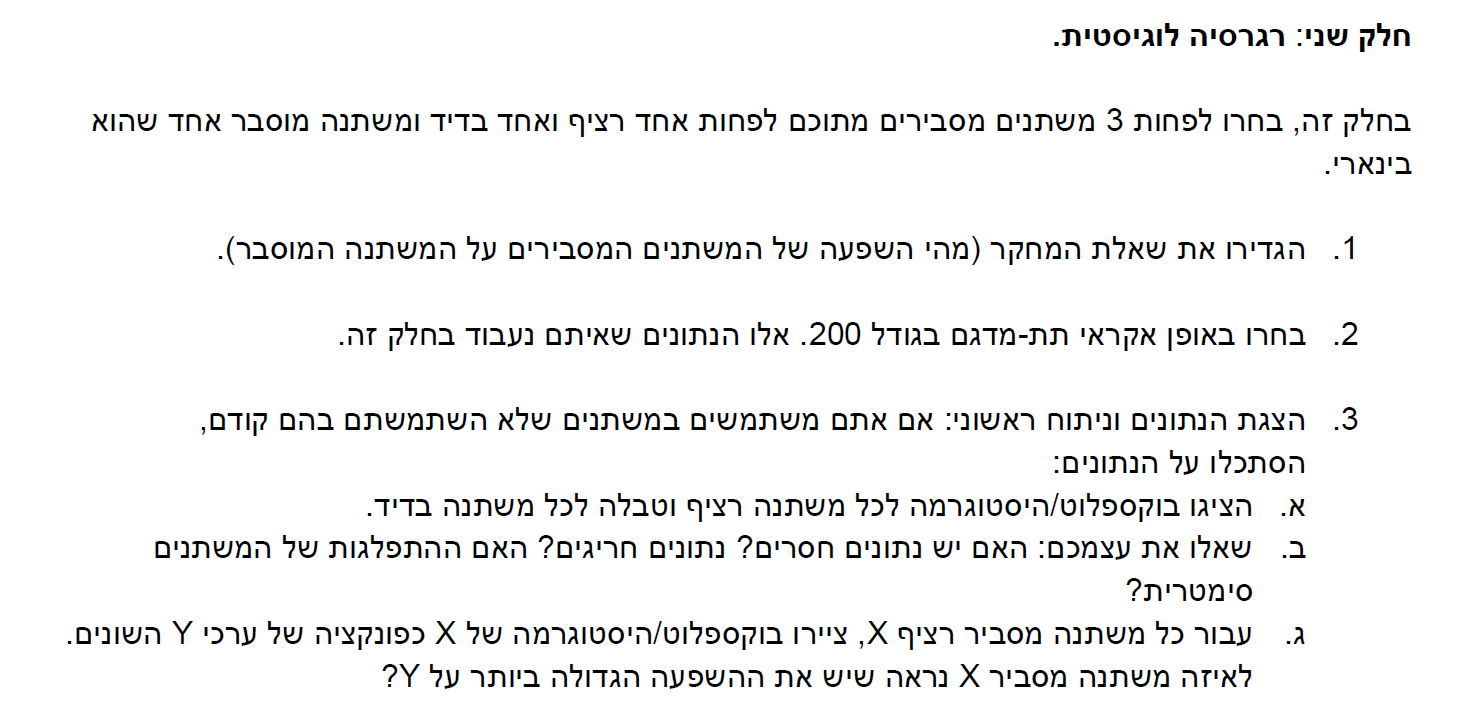

In [37]:
df_athletes

,nationality,sex,height,weight,sport,gold,silver,bronze,if_medal,BMI
0,ESP,male,1.72,64.0,athletics,0,0,0,False,21.633315
1,KOR,female,1.68,56.0,fencing,0,0,0,False,19.841270
2,CAN,male,1.98,79.0,athletics,0,0,1,True,20.151005
3,MDA,male,1.83,80.0,taekwondo,0,0,0,False,23.888441
4,NZL,male,1.81,71.0,cycling,0,0,0,False,21.672110
...,...,...,...,...,...,...,...,...,...,...
11533,CUB,female,1.64,58.0,athletics,0,0,0,False,21.564545
11534,CZE,female,1.73,63.0,athletics,0,0,0,False,21.049818
11535,CHN,male,1.85,100.0,wrestling,0,0,0,False,29.218408
11536,VIE,male,1.60,56.0,weightlifting,0,0,0,False,21.875000


In [38]:
n = 200
np.random.seed(seed)
a = np.random.choice(len(df_athletes), n, replace=False)
sel = [1,2,3,8]
df = df_athletes.iloc[a,sel]
print(df.count())

df.drop(df.index[df.isnull().any(axis=1)],0, inplace=True)
print(df.count())

sex         200
height      198
weight      193
if_medal    200
dtype: int64
sex         193
height      193
weight      193
if_medal    193
dtype: int64


סקירת המדגם:
ישנם מספר ערכים חסרים במשתנה הגובה והמשקל, ההתמודדות עם עובדה זו תהיה בהוצאת הדגימות עם הערכים החסרים מהמדגם.


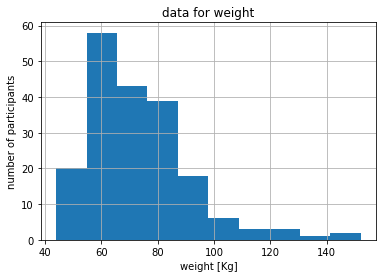

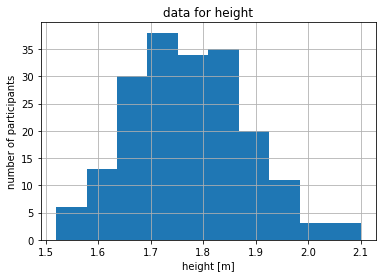

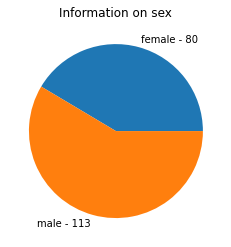

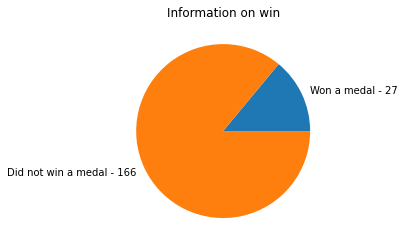

In [39]:
plt.hist(df['weight']);
plt.xlabel('weight [Kg]')
plt.ylabel('number of participants')
plt.title('data for weight')
plt.grid()
plt.show()


plt.hist(df['height']);
plt.xlabel('height [m]')
plt.ylabel('number of participants')
plt.title('data for height')
plt.grid()
plt.show()

no = int(len(df[df['sex'] == 'male']))
yes = int(len(df[df['sex'] == 'female']))
plt.pie([yes, no], labels = [f'female - {yes}' , f'male - {no}']);
plt.title('Information on sex');
plt.show()

no = int(len(df[df['if_medal'] == False]))
yes = int(len(df[df['if_medal'] == True]))
plt.pie([yes, no], labels = [f'Won a medal - {yes}' , f'Did not win a medal - {no}']);
plt.title('Information on win');
plt.show()


אפשר לראות שהתפלגות המשקל נוטה כלפי מטה ( יש פחות ספורטאים ששוקלים יותר)

אפשר לראות שהתפלגות הגובה יחסית נורמלית

אפשר לראות ש-20% מהמדגם זכה במדליה כלשהי

משתנים מסבירים:
1. גובה
2. משקל
3. זכה/לא זכה במדליה - משתנה קטגוריאלי

משתנה מוסבר:

מין הספורטאי

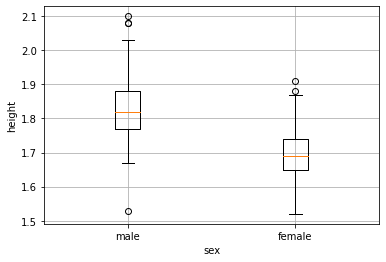

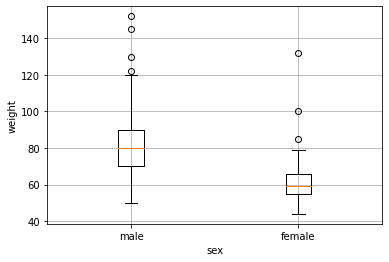

In [40]:
yes = df.height[df.sex == 'male']
no = df.height[df.sex == 'female']
plt.boxplot([yes,no])
plt.xlabel('sex')
plt.xticks([1,2],['male', 'female'])
plt.ylabel('height')
plt.grid()

plt.show()

yes = df.weight[df.sex == 'male']
no = df.weight[df.sex == 'female']
plt.boxplot([yes,no])
plt.xlabel('sex')
plt.xticks([1,2],['male', 'female'])
plt.ylabel('weight')
plt.grid()

plt.show()

נראה כי קיים קשר הדוק בין הגובה למגדר

נראה כי קיים קשר הדוק בין המשקל למגדר


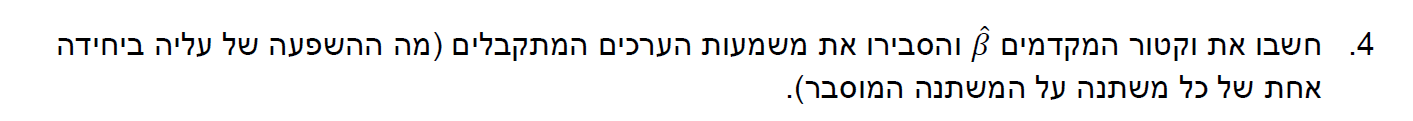

In [41]:
sel = [1,2,3,8]
df = df_athletes.iloc[a,sel]
df.drop(df.index[df.isnull().any(axis=1)],0, inplace=True)
sex = pd.get_dummies(df.sex)
if_medal = pd.get_dummies(df.if_medal)
df_d = pd.concat([df.height,df.weight,sex, if_medal], axis=1)
df_d

Y = np.array(df_d.iloc[:,3])
sel = [0,1,-1]
X = np.array(df_d.iloc[:,sel])
X = np.concatenate([np.ones([(X.shape[0]),1]),X], axis = 1)

reg = LogisticRegression()
reg.fit(X = X,y = Y)

beta = np.zeros([4,1])
sel = ['height', 'weight', 'won']

beta[0] = reg.intercept_
for i in range(1, len(reg.coef_[0,:])):   beta[i] = reg.coef_[0,i]
# print('beta for the sample:')
# print(list(zip(sel,beta[1:])))
for i in range(2):
    print(f'An increase in one unit of *{sel[i]}* will cause to multiplication of {math.exp(beta[i+1]):.2f} in the probability to be man')
# print(f'If An increase in one unit of *{sel[i]}* will result in an increase of {math.exp(beta[i+1]):.2f} in the probability to be man')
print(f'If the athlete won the medal the chance of being a man would be doubled by {math.exp(beta[-1]):.2f}, that is, it would decrease')


An increase in one unit of *height* will cause to multiplication of 3.06 in the probability to be man
An increase in one unit of *weight* will cause to multiplication of 1.13 in the probability to be man
If the athlete won the medal the chance of being a man would be doubled by 0.59, that is, it would decrease


אפשר לראות עלייה במשקל ובגובה תגרום לעלייה בסיכוי להיות גבר, עלייה במשקל משמעותית יותר. 

מסקנה זו מתאימה לאיור הבוקספלוט המתאר את הקשר בין המשקל למגדר ובין הגובה למגדר

כמו כן ישנה מסקנה מעניינת המראה כי זכייה במדליה מפחיתה את הסיכוי להיות גבר

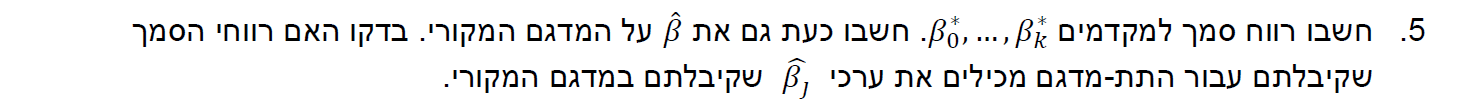

In [42]:
sel = [1,2,3,8]
df = df_athletes.iloc[a,sel]
df.drop(df.index[df.isnull().any(axis=1)],0, inplace=True)
sex = pd.get_dummies(df.sex)
if_medal = pd.get_dummies(df.if_medal)
df_d = pd.concat([df.height,df.weight,sex, if_medal], axis=1)
df_d

Y = np.array(df_d.iloc[:,3])
sel = [0,1,-1]
X = np.array(df_d.iloc[:,sel])
X = np.concatenate([np.ones([(X.shape[0]),1]),X], axis = 1)

reg = LogisticRegression()
reg.fit(X = X,y = Y)

beta = np.zeros([4,1])
beta[0] = reg.intercept_
for i in range(1, len(reg.coef_[0,:])):   beta[i] = reg.coef_[0,i]
sel = ['height', 'weight', 'won']
print('beta for the sample:')
print(list(zip(sel,beta[1:,0])))


pi = np.zeros([len(X), 2])
for i in range(len(X)):
    t = beta.T @ X[i,:] 
    e_t = math.exp(t)
#     pi = 
    pi[i,0] = e_t/(1+e_t)
    
pi[pi[:,0] > 0.5, 1] = 1

v = pi[:,0]*(1-pi[:,0])
v_mat = np.diag(v)
C = np.linalg.inv(X.T @ v_mat @ X)
CI = np.zeros([len(beta),2])
CI[:,0] = beta[:,0]

for i in range(len(beta)):
    CI[i,1] = 1.96 * np.sqrt(C[i,i])
sel = ['height', 'weight', 'won']
print()

print('CI:')
for i in range(1,len(beta)):
    lower = CI[i,0] - CI[i,1]
    upper = CI[i,0] + CI[i,1]
    print(f'[{lower:.5f} , {upper:.5f}] for beta of {sel[i-1]}')

sel = [1,2,3,8]
df = df_athletes.iloc[:,sel]
df.drop(df.index[df.isnull().any(axis=1)],0, inplace=True)
sex = pd.get_dummies(df.sex)
if_medal = pd.get_dummies(df.if_medal)
df_d = pd.concat([df.height,df.weight,sex, if_medal], axis=1)
df_d

Y = np.array(df_d.iloc[:,3])
sel = [0,1,-1]
X = np.array(df_d.iloc[:,sel])
X = np.concatenate([np.ones([(X.shape[0]),1]),X], axis = 1)

reg = LogisticRegression()
reg.fit(X = X,y = Y)

beta = np.zeros([4,1])
beta[0] = reg.intercept_
for i in range(1, len(reg.coef_[0,:])):   beta[i] = reg.coef_[0,i]
print()
print('beta for all th data:')
sel = ['height', 'weight', 'won']

print(list(zip(sel,beta[1:,0])))    
print()

print('It can be seen that the confidence intervals  contain the beta for all the coefficients')
    

beta for the sample:
[('height', 1.1181139564793496), ('weight', 0.11929105228932245), ('won', -0.5263462165576498)]

CI:
[-4.46269 , 6.69891] for beta of height
[0.06950 , 0.16908] for beta of weight
[-1.66688 , 0.61419] for beta of won

beta for all th data:
[('height', 6.455625325638365), ('weight', 0.07869266887120409), ('won', -0.5618316529243871)]

It can be seen that the confidence intervals  contain the beta for all the coefficients


התקבל כי רווחי הסמך שנמצאו מהמדגם כוללים את מקדמי הביתא שנמצאו מהאוכלוסייה (מהמדגם המקורי), 

המשמעות היא שאף שהמדגם קטן יחסית הצלחנו למצוא מקדמים אשר עם רווחי סמך מתארים היטב את האוכלוסייה

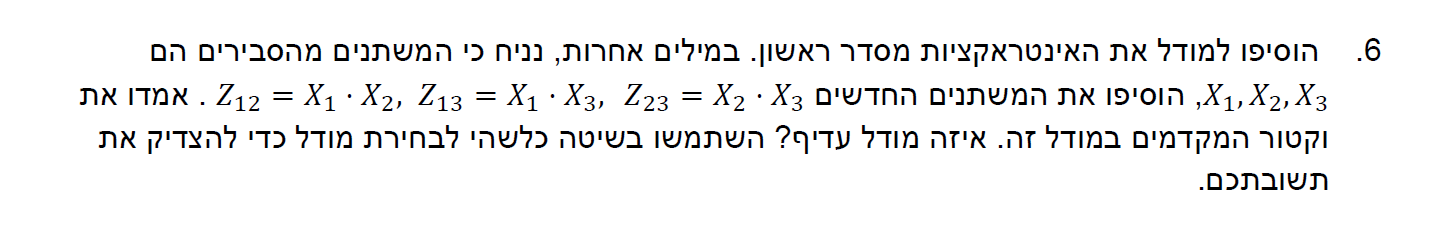

In [43]:
sel = [1,2,3,8]
df = df_athletes.iloc[a,sel]
df.drop(df.index[df.isnull().any(axis=1)],0, inplace=True)
sex = pd.get_dummies(df.sex)
if_medal = pd.get_dummies(df.if_medal)
df_d = pd.concat([df.height,df.weight,sex, if_medal], axis=1)
df_x = df_d.iloc[:,[0,1,-1]]

Y = np.array(df_d.iloc[:,3])
# sel = [0,1,-1]
X = np.array(df_x)#d.iloc[:,sel])
X = np.concatenate([np.ones([(X.shape[0]),1]),X], axis = 1)
X

reg = LogisticRegression()
reg.fit(X = X,y = Y)

beta = np.zeros([X.shape[1],1])
beta[0] = reg.intercept_
for i in range(1, len(reg.coef_[0,:])):   beta[i] = reg.coef_[0,i]
# print('beta for the sample:')
# print(beta[1:])


pi = np.zeros([len(X), 2])
for i in range(len(X)):
    t = beta.T @ X[i,:] 
    e_t = math.exp(t)
    pi[i,0] = e_t/(1+e_t)

likelihood = 1
for i in range(len(X)):
    likelihood *= pi[i,0]**Y[i]*(1-pi[i,0])**(1-Y[i])
BIC0 = math.log(likelihood)-((beta.shape[0]-1)/2)*math.log(len(X))

sel = [1,2,3,8]
df = df_athletes.iloc[a,sel]
df.drop(df.index[df.isnull().any(axis=1)],0, inplace=True)
sex = pd.get_dummies(df.sex)
if_medal = pd.get_dummies(df.if_medal)
df_d = pd.concat([df.height,df.weight,sex, if_medal], axis=1)
df_x = df_d.iloc[:,[0,1,-1]]

col = df_x.columns

df_x[f'{col[0]}_{col[1]}'] = df_x[col[0]]*df_x[col[1]]
df_x[f'{col[0]}_{col[2]}'] = df_x[col[0]]*df_x[col[2]]
df_x[f'{col[1]}_{col[2]}'] = df_x[col[1]]*df_x[col[2]]
df_x
Y = np.array(df_d.iloc[:,3])
# sel = [0,1,-1]
X = np.array(df_x)#d.iloc[:,sel])
X = np.concatenate([np.ones([(X.shape[0]),1]),X], axis = 1)
X

reg = LogisticRegression()
reg.fit(X = X,y = Y)

beta = np.zeros([X.shape[1],1])
beta[0] = reg.intercept_
for i in range(1, len(reg.coef_[0,:])):   beta[i] = reg.coef_[0,i]
print('beta for the sample:')
sel = list(df_x.columns)
sel[2] = 'won_in_medal'
sel[4] = 'height_won_in_medal'
sel[5] = 'weight_won_in_medal'
for i in range(len(sel)):
    print(f'the beta of {sel[i]} is {beta[i+1,0]:.3f}')
    


pi = np.zeros([len(X), 2])
for i in range(len(X)):
    t = beta.T @ X[i,:] 
    e_t = math.exp(t)
    pi[i,0] = e_t/(1+e_t)

likelihood = 1
for i in range(len(X)):
    likelihood *= pi[i,0]**Y[i]*(1-pi[i,0])**(1-Y[i])
BIC1 = math.log(likelihood)-((beta.shape[0]-1)/2)*math.log(len(X))

print()
print(f'BIC0: {BIC0}')

print(f'BIC1: {BIC1}')

beta for the sample:
the beta of height is 0.170
the beta of weight is -0.149
the beta of won_in_medal is -0.155
the beta of height_weight is 0.131
the beta of height_won_in_medal is -0.477
the beta of weight_won_in_medal is 0.005

BIC0: -94.98664169730169
BIC1: -98.91577693434994


ניתן לראות כי משילוב הפיצ'רים התקבל פיצ'ר משמעותי ביותר - שילוב של גובה וזכייה במדליה

נבדק מדד ה 

BIC

עבור שני המודלים

נמצא כי עבור המודל המקורי (המצומצם) התקבל ערך גבוה יותר (-95) לעומת הערך שהתקבל עבור המודל המורחב (-99)

מסיבה זו יש להמליץ על בחירת המודל המצומצם

### Part 4

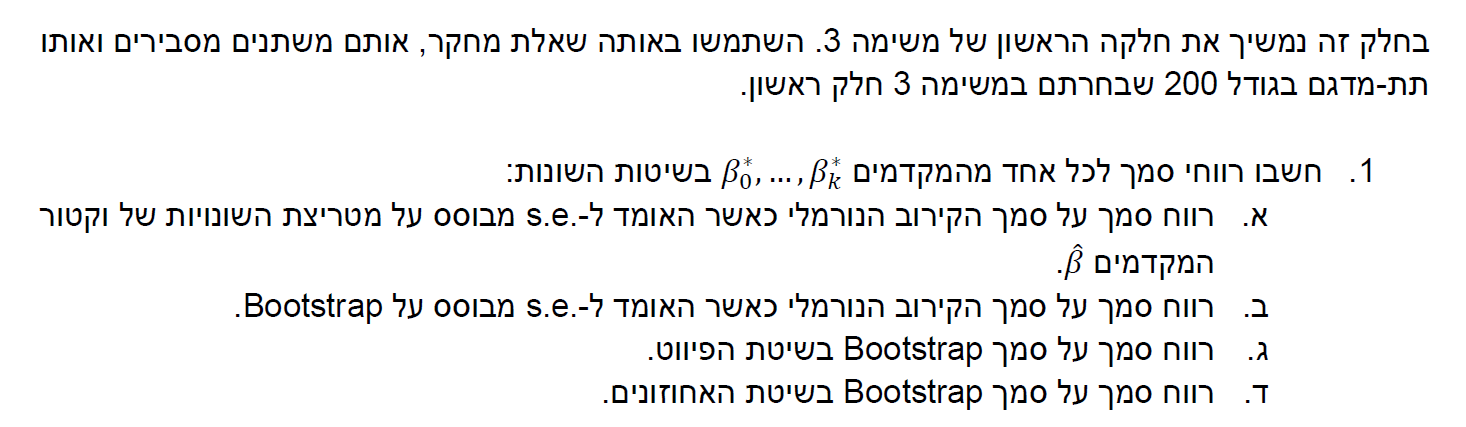

In [44]:
n = 200
np.random.seed(seed)
a = np.random.choice(len(df_athletes), n, replace=False)
sel = [1,2,3,8]
df = df_athletes.iloc[a,sel]
print(df.count())

df.drop(df.index[df.isnull().any(axis=1)],0, inplace=True)
print(df.count())

sex         200
height      198
weight      193
if_medal    200
dtype: int64
sex         193
height      193
weight      193
if_medal    193
dtype: int64


In [45]:
sel = [1,2,3,4]
df = df_athletes.iloc[a,sel]
n = 11
labels = df['sport'].value_counts()[:n].index.tolist()
count = df['sport'].value_counts()[:n].tolist()
for i in range(len(df)):
    if labels.count(df['sport'].iloc[i]) == 0:
        df['sport'].iloc[i] = 'other'

labels = df['sport'].value_counts()[:n].index.tolist()
# for i in range(len(df)):
#     if labels.count(df['sport'].iloc[i]) == 0:
#         df['sport'].iloc[i] = 'other'
df.drop(df.index[df.isnull().any(axis=1)],0, inplace=True)
sport = pd.get_dummies(df.sport)
sex = pd.get_dummies(df.sex)
df_d = pd.concat([df.height,df.weight,sex, sport], axis=1)

labels.append( 'weight')
labels.append( 'male')

sel = labels[1:]
df_x = df_d.loc[:,sel]
Y = np.array(df_d.height)
X = np.array(df_x)
X = np.concatenate([np.ones([(X.shape[0]),1]),X], axis = 1)


XT_dot_X = np.matmul(X.transpose(), X) # X*X_T
XT_dot_X_inv = np.linalg.inv(XT_dot_X)
beta_kova = np.matmul(np.matmul(XT_dot_X_inv, X.transpose()), Y) 
beta_kova[1:]
Y_mean = sum(Y)/len(Y)
SST = sum([(t-Y_mean)**2 for t in Y])
Y_hat = np.dot(X, beta_kova)
e = np.subtract(Y,Y_hat)
Y_hat_200 = Y_hat
e_200 = e
SS_res = sum([k**2 for k in e])
n = len(Y)
MS_res = SS_res/(n-X.shape[1]-1)

data = pd.DataFrame(columns= ['SS','df','MS', 'F_ratio', 'P_value'], index=['Reg', 'Res', 'Total'])
data.SS[2] = SST
data.SS[1] = SS_res
data.SS[0] = SST - SS_res
data.df = [X.shape[1], X.shape[0]-X.shape[1]-1,X.shape[0]-1]
data.MS = data.SS/data.df
data.loc['Reg','F_ratio'] = (data.MS['Reg']/data.MS['Res'])

R_2 = 1 - (data.SS['Res']/data.SS['Total'])
R_2_adj = 1 - (1-R_2)*((X.shape[0]-1)/(X.shape[0]-X.shape[1]-1))
F_stat = stat.f.ppf(q=1-0.05, dfn=X.shape[1], dfd=X.shape[0]-X.shape[1]-1)
p_value =  1-stat.f.cdf(data.loc['Reg','F_ratio'], dfn=X.shape[1], dfd=X.shape[0]-X.shape[1]-1)
data.loc['Reg','P_value'] = p_value
# find CI:
CI = np.zeros([len(beta_kova[1:]),2])
CI[:,0] = beta_kova[1:]
for i in range(1, len(beta_kova)):
    CI[i-1,1] = 1.96 * data.loc['Reg','MS'] * XT_dot_X_inv[i,i]
    
CI_1 = np.zeros([len(beta_kova[1:]),2])


for i in range(1,len(beta_kova)):
    lower = CI[i-1,0] - CI[i-1,1]
    upper = CI[i-1,0] + CI[i-1,1]
    CI_1[i-1:,] = [lower,upper]
    c = beta_kova[i] 
#     print(f'[{lower:.5f} < {c:.5f} < {upper:.5f}] CI of {sel[i-1]}')
beta_heat_sample = beta_kova

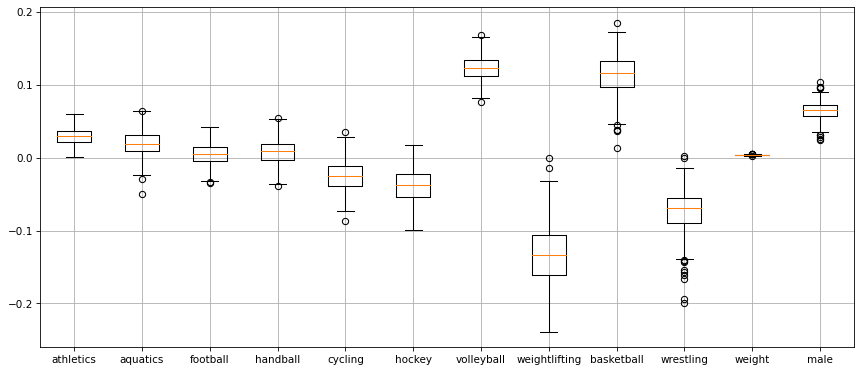

In [46]:
sel = [1,2,3,4]
df = df_athletes.iloc[a,sel]
n = 11
labels = df['sport'].value_counts()[:n].index.tolist()
count = df['sport'].value_counts()[:n].tolist()
for i in range(len(df)):
    if labels.count(df['sport'].iloc[i]) == 0:
        df['sport'].iloc[i] = 'other'

labels = df['sport'].value_counts()[:n].index.tolist()
df.drop(df.index[df.isnull().any(axis=1)],0, inplace=True)
sport = pd.get_dummies(df.sport)
sex = pd.get_dummies(df.sex)
df_d = pd.concat([df.height,df.weight,sex, sport], axis=1)

labels.append( 'weight')
labels.append( 'male')

sel = labels[1:]
df_x = df_d.loc[:,sel]
Y = np.array(df_d.height)
X = np.array(df_x)
X = np.concatenate([np.ones([(X.shape[0]),1]),X], axis = 1)
    
sub_sample = a[:]
idx_sample = np.zeros([400,X.shape[0]])
beta_be = np.zeros([400,X.shape[1]-1])
reg = LinearRegression()

for i in range(400):
    idx_sample[i,:] = np.random.choice(list(range(len(X))),len(X))
    
for i in range(400):
    b = idx_sample[i,:].astype(int)
    Y1 = Y[b]
    X1 = X[b,:]
    reg.fit(X1,Y1)
    beta_be[i,:] = reg.coef_[1:]
plt.figure(figsize=(14,6), dpi = 75)    
    
plt.boxplot(beta_be, labels = sel)
# plt.xlabel(sel)
plt.grid()
plt.show()

בפוקספלוט מוצגים ערכי מקדם עבור כל משנה כפי שהתקבלו לאחר ביצוע הבוטסטראפ.
ניתן לראות שלחלק מהמשתנים יש פיזור גבוה יחסית ולחקל פיזור נמוך.
לדוגמה, משתנה המשקל מתאפיין בפיזור מאוד נמוך, כלומר, ערך המקדם למשקל כמעט לא מושפע מהמדגם המוגרל

In [47]:
# normal approximation 

In [48]:
# find CI:
CI = np.zeros([len(beta_kova[1:]),2])
CI[:,0] = beta_kova[1:]
for i in range(1, len(beta_kova)):
    se_be = np.sqrt(sum(beta_be[:,i-1]**2)/len(beta_be) - (sum(beta_be[:,i-1])/len(beta_be))**2)
    CI[i-1,1] = 1.96 * se_be
CI_2 = np.zeros([len(beta_kova[1:]),2])
for i in range(1,len(beta_kova)):
    lower = CI[i-1,0] - CI[i-1,1]
    upper = CI[i-1,0] + CI[i-1,1]
    CI_2[i-1:,] = [lower,upper]
    c = beta_kova[i] 
#     print(f'[{lower:.5f} < {c:.5f} < {upper:.5f}] CI of {sel[i-1]}')

In [49]:
# percentile CI

In [50]:
CI_3 = np.zeros([len(beta_kova[1:]),2])

minimum = 2.5
maximum = 97.5
for i in range(1,len(beta_kova)):
    lower = np.percentile(beta_be[:,i-1],minimum)
    upper = np.percentile(beta_be[:,i-1],maximum)
    CI_3[i-1:,] = [lower,upper]

In [51]:
# pivotal CI

In [52]:
CI_4 = np.zeros([len(beta_kova[1:]),2])

minimum = 2.5
maximum = 97.5
for i in range(1,len(beta_kova)):
    lower = 2*beta_heat_sample[i] - np.percentile(beta_be[:,i-1],maximum)
    upper = 2*beta_heat_sample[i] - np.percentile(beta_be[:,i-1],minimum)
    CI_4[i-1:,] = [lower,upper]


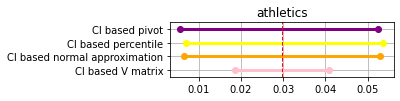

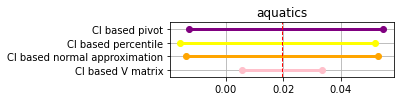

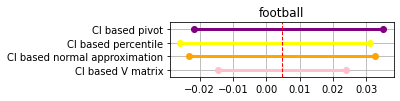

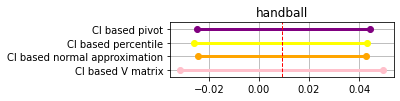

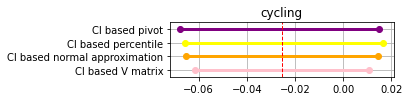

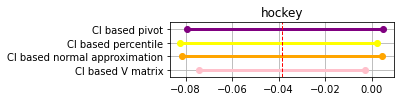

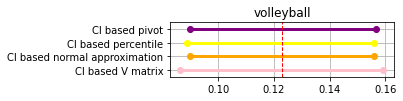

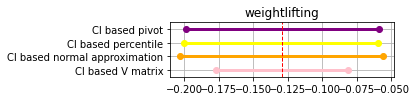

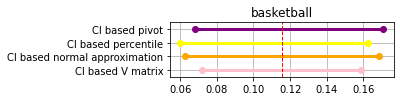

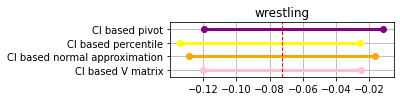

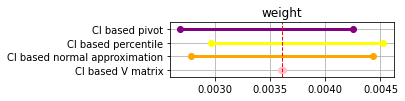

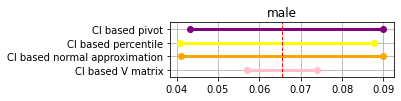

In [53]:
for i in range(12):
    data_dict = {}
    data_dict['category'] = [
        'CI based V matrix',
        'CI based normal approximation',
        'CI based percentile',
        'CI based pivot',
        ]
    data_dict['lower'] = [CI_1[i,0],CI_2[i,0],CI_3[i,0],CI_4[i,0]]
    data_dict['upper'] = [CI_1[i,1],CI_2[i,1],CI_3[i,1],CI_4[i,1]]

    dataset = pd.DataFrame(data_dict)
    color = ['pink','orange','yellow','purple']
    plt.figure(figsize=(4,1))    

    for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
        plt.plot((lower,upper),(y,y),'ro-',color=color[y],linewidth=3)
    plt.yticks(range(len(dataset)),list(dataset['category']))
    plt.axvline(x=beta_heat_sample[i+1], color='r', linestyle='--', linewidth=1,label = 'real mean \nof male')
    plt.title(f'{sel[i]}')
    plt.ylim([-0.5,3.5])
    plt.grid()
    plt.show()

ניתן לראות באיור את רווחי הסמך שהתקבלו עבור כל משתנה

הקו האדום מייצג את ערך המקדם שחושב במדגם

אפשר לראות שרווחי הסמך מבוססי בוטסטראפ מקבלים ערך דומה בכל 3 השיטות בהן הם חושבו. 

לעומת זאת, ניתן לראות שעבור חלק מהמשתנים רווח הסמך מבוסס מטריצת השונות הינו קטן יותר משמעותית

בייחוד ניתן לשים לב לכך במשנה המשקל, אני מעריך שזה המצב מכיוון שמשתנה זה הינו רציף בשונה משאר המשתנים שהינם קטגוריאליים

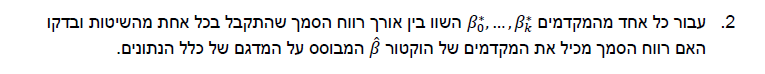

In [54]:
# find real coefficient:

sel = [1,2,3,4]
df = df_athletes.iloc[a,sel]
n = 11
labels = df['sport'].value_counts()[:n].index.tolist()
count = df['sport'].value_counts()[:n].tolist()

for i in range(len(df)):
    if labels.count(df['sport'].iloc[i]) == 0:
        df['sport'].iloc[i] = 'other'
        
labels = df['sport'].value_counts()[:n].index.tolist()
#----
sel = [1,2,3,4]
df = df_athletes.iloc[:,sel]

for i in range(len(df)):
    if labels.count(df['sport'].iloc[i]) == 0:
        df['sport'].iloc[i] = 'other'
        
df.drop(df.index[df.isnull().any(axis=1)],0, inplace=True)
sport = pd.get_dummies(df.sport)
sex = pd.get_dummies(df.sex)
df_d = pd.concat([df.height,df.weight,sex, sport], axis=1)
labels.append( 'weight')
labels.append( 'male')

sel = labels[1:]
df_x = df_d.loc[:,sel]
Y = np.array(df_d.height)
X = np.array(df_x)
X = np.concatenate([np.ones([(X.shape[0]),1]),X], axis = 1)

XT_dot_X = np.matmul(X.transpose(), X) # X*X_T
XT_dot_X_inv = np.linalg.inv(XT_dot_X)
beta_kova = np.matmul(np.matmul(XT_dot_X_inv, X.transpose()), Y) 
real_beta = beta_kova


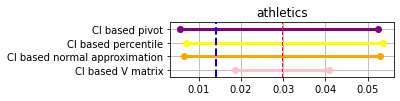

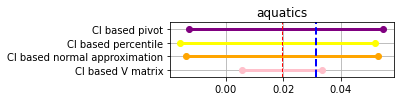

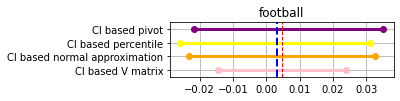

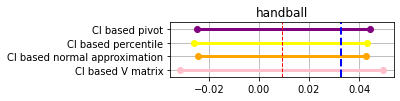

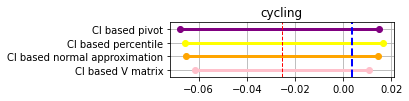

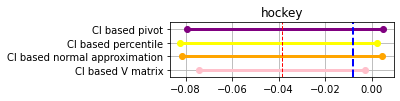

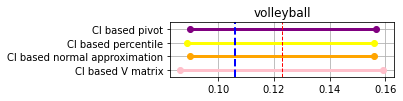

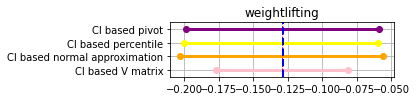

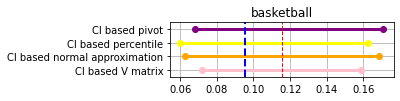

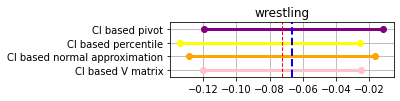

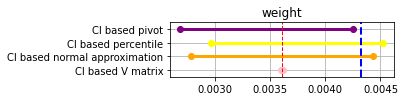

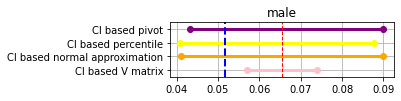

In [55]:
for i in range(12):
    data_dict = {}
    data_dict['category'] = [
        'CI based V matrix',
        'CI based normal approximation',
        'CI based percentile',
        'CI based pivot',
        ]
    data_dict['lower'] = [CI_1[i,0],CI_2[i,0],CI_3[i,0],CI_4[i,0]]
    data_dict['upper'] = [CI_1[i,1],CI_2[i,1],CI_3[i,1],CI_4[i,1]]

    dataset = pd.DataFrame(data_dict)
    color = ['pink','orange','yellow','purple']
    plt.figure(figsize=(4,1))    

    for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
        plt.plot((lower,upper),(y,y),'ro-',color=color[y],linewidth=3)
    plt.yticks(range(len(dataset)),list(dataset['category']))
    plt.axvline(x=beta_heat_sample[i+1], color='r', linestyle='--', linewidth=1,label = 'real mean \nof male')
    plt.axvline(x=real_beta[i+1], color='b', linestyle='--', linewidth=2,label = 'beta_heat')

    plt.title(f'{sel[i]}')
    plt.ylim([-0.5,3.5])
    plt.grid()
    plt.show()

באיור זה נוסף הקו הכחול המייצג את המקדם עבור המשתנה באוכלוסייה.

אפשר לראות שכל רווחי הסמך מבוססי בטוסטראפ בכל המשנים מכילים את המקדם האמיתי.

במשתנה המשקל והמגדר למשל, רווח הסמך מבוסס השונות לא מכיל את המדם האמיתי ואילו רווחי הסמך מבוסס ב"ס כן מכיל

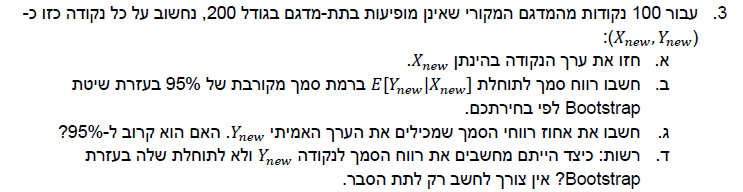

In [56]:
n = 200
np.random.seed(seed)
a = np.random.choice(len(df_athletes), n, replace=False)
b = list(df_athletes.index)
for i in a: b.remove(i)

n = 100
np.random.seed(seed)
a1 = np.random.choice(b, n, replace=False)
sel = [1,2,3,4]
df1 = df_athletes.iloc[a1,sel]
# print(df1.count())
df1.drop(df1.index[df1.isnull().any(axis=1)],0, inplace=True)
# print(df1.count())

In [57]:
sel = [1,2,3,4]
df = df_athletes.iloc[a,sel]
n = 11
labels = df['sport'].value_counts()[:n].index.tolist()
count = df['sport'].value_counts()[:n].tolist()
for i in range(len(df)):
    if labels.count(df['sport'].iloc[i]) == 0:
        df['sport'].iloc[i] = 'other'

labels = df['sport'].value_counts()[:n].index.tolist()
df.drop(df.index[df.isnull().any(axis=1)],0, inplace=True)
sport = pd.get_dummies(df.sport)
sex = pd.get_dummies(df.sex)
df_d = pd.concat([df.height,df.weight,sex, sport], axis=1)

labels.append( 'weight')
labels.append( 'male')

sel = labels[1:]
df_x = df_d.loc[:,sel]
Y = np.array(df_d.height)
X = np.array(df_x)
X = np.concatenate([np.ones([(X.shape[0]),1]),X], axis = 1)
    
sub_sample = a[:]
idx_sample = np.zeros([400,X.shape[0]])
beta_be = np.zeros([400,X.shape[1]])
reg = LinearRegression()

for i in range(400):
    idx_sample[i,:] = np.random.choice(list(range(len(X))),len(X))
    
for i in range(400):
    b = idx_sample[i,:].astype(int)
    Y1 = Y[b]
    X1 = X[b,:]
    reg.fit(X1,Y1)
    beta_be[i,1:] = reg.coef_[1:]
    beta_be[i,0] = reg.intercept_

In [58]:
Y_hat = np.dot(X, beta_heat_sample)

In [59]:
Y_hat_be = np.zeros([400, len(X)])
for i in range(len(beta_be)):
    Y_hat_be[i,:] = np.dot(X , beta_be[i,:])
    
CI_Y_new = np.zeros([len(X),2])

minimum = 2.5
maximum = 97.5
for i in range(len(X)):
    lower = np.percentile(Y_hat_be[:,i],minimum)
    upper = np.percentile(Y_hat_be[:,i],maximum)
    CI_Y_new[i,:] = [lower,upper]
    
count = 0
for i in range(len(X)):
    if Y[i] > CI_Y_new[i,0]:
        if Y[i] < CI_Y_new[i,1]:
            count += 1
            
count/len(X)


0.37305699481865284

ניתן לראות שאחוז רווחי הסמך חתחזית המכילים את התחיזת האמיתי הינו  35% למרות שביצענו לתחזית רווח סמך עבור 95%

ההבדל בין רווח סמך לתחזית לבין רווח סמך לתוחלת התחזית הוא שברווח סמך לתחזית אנחנו כוללים גם את השונות של האפסילון וברווח סמך לתוחלת אנחנו לא כוללים את השונות של  אפסילון כי בתוחלת השונות של האפסילון היא אפס.

מכיוון שכאן עשינו רווח סמך לתוחלת של התחזית אזי רווח הסמך הזה מצליח להכניס פחות תחזיות לתוכו

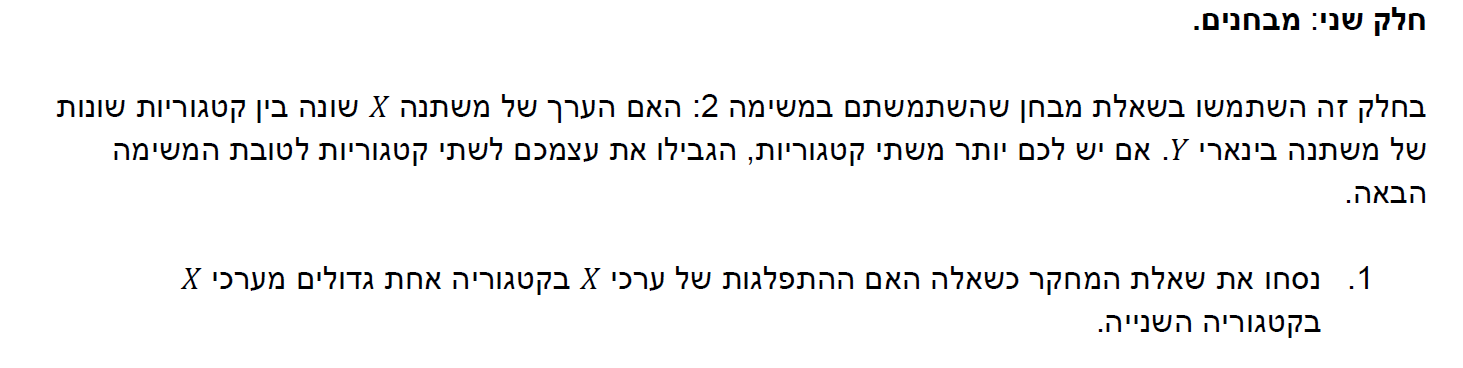

האם הערכים בקבוצת הגברים גדולים מהערכים בקבוצת הנשים?


<!-- ##### a

H0: miu_1 - miu_2 = 0

H1: miu_1 - miu_2 != 0
 -->

In [60]:
df = df_athletes[['sex','BMI']].copy()
df.drop(df.index[df.isnull().any(axis=1)],0, inplace=True)
df
n = 200
seed = 985789
np.random.seed(seed)
a = np.random.choice(len(df), n, replace=False)
df = df.iloc[a,:]

סקירת המדגם:
ישנם מספר ערכים חסרים במשתנה הגובה והמשקל, ההתמודדות עם עובדה זו תהיה בהוצאת הדגימות עם הערכים החסרים מהמדגם.


-population-


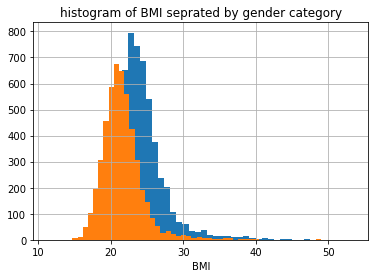

Mean of male and female of BMI:
male: 23.96
female: 21.58

STD of male and female of BMI:
male: 3.41
female: 2.93

-sample-


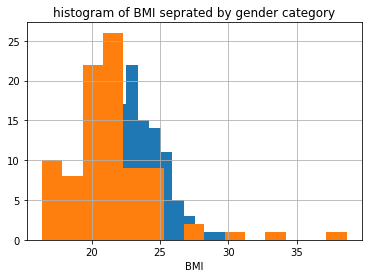

we can assume normal distribution of the sample


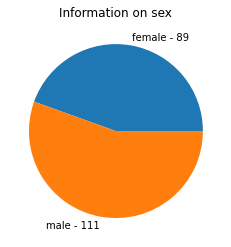

Mean of male and female of BMI:
male: 23.42
female: 21.45

STD of male and female of BMI:
male: 2.21
female: 3.34



In [61]:
print('-population-')
plt.hist(df_athletes['BMI'][df_athletes['sex']== 'male'], 50)
plt.hist(df_athletes['BMI'][df_athletes['sex']== 'female'], 50)
plt.xlabel('BMI')
plt.title('histogram of BMI seprated by gender category')
plt.grid()
plt.show()

print('Mean of male and female of BMI:')
a = df_athletes.groupby(['sex']).mean().iloc[:,6]
print(f'male: {a[1]:.2f}')
print(f'female: {a[0]:.2f}')
print('')

print('STD of male and female of BMI:')
b = df_athletes.groupby(['sex']).std().iloc[:,6]
print(f'male: {b[1]:.2f}')
print(f'female: {b[0]:.2f}')
print('')

print('-sample-')
plt.hist(df['BMI'][df['sex']== 'male'],15)
plt.hist(df['BMI'][df['sex']== 'female'], 15)
plt.xlabel('BMI')
plt.title('histogram of BMI seprated by gender category')
plt.grid()
plt.show()
print('we can assume normal distribution of the sample')

no = int(len(df[df['sex'] == 'male']))
yes = int(len(df[df['sex'] == 'female']))
plt.pie([yes, no], labels = [f'female - {yes}' , f'male - {no}']);
plt.title('Information on sex');
plt.show()

print('Mean of male and female of BMI:')
a = df.groupby(['sex']).mean().loc[:,'BMI']
print(f'male: {a[1]:.2f}')
print(f'female: {a[0]:.2f}')
print('')

print('STD of male and female of BMI:')
b = df.groupby(['sex']).std().loc[:,'BMI']
print(f'male: {b[1]:.2f}')
print(f'female: {b[0]:.2f}')
print('')


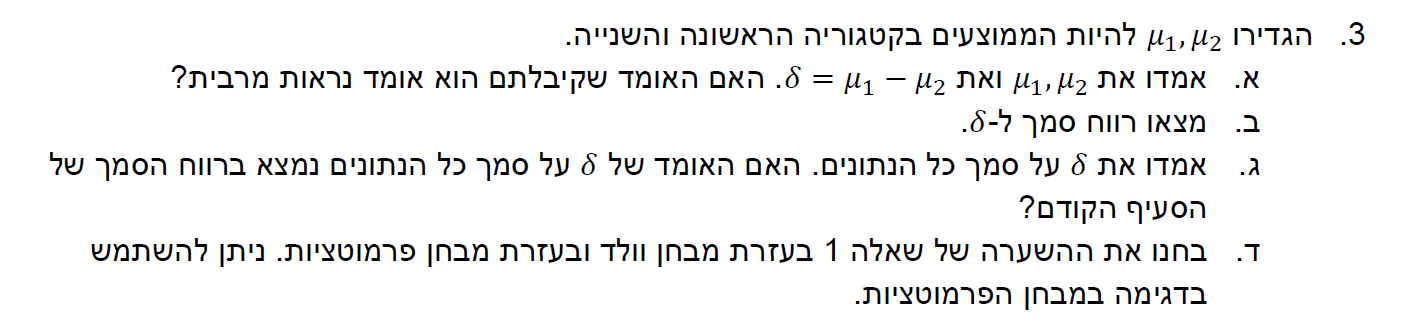

In [62]:
print('Mean of male and female of BMI:')
mean = df.groupby(['sex']).mean().loc[:,'BMI']
print(f'male: {mean[1]:.2f}')
print(f'female: {mean[0]:.2f}')
print('')

delta = mean[1] - mean[0]
print(delta)
count = df.groupby(['sex']).count().loc[:,'BMI']

S_f = sum((df.BMI[df.sex == 'female']-mean[0])**2)/count[0]
S_m = sum((df.BMI[df.sex == 'male']-mean[1])**2)/count[1]

print(f'CI: [{delta - 1.96*np.sqrt(S_f/count[0] + S_m/count[1]):.2f}, {delta + 1.96 * np.sqrt(S_f/count[0] + S_m/count[1]):.2f}]')

Mean of male and female of BMI:
male: 23.42
female: 21.45

1.9747327290681405
CI: [1.17, 2.78]


In [63]:
print('Mean of male and female of BMI:')
mean = df_athletes.groupby(['sex']).mean().loc[:,'BMI']
print(f'male: {mean[1]:.2f}')
print(f'female: {mean[0]:.2f}')
print('')

delta = mean[1] - mean[0]
delta

Mean of male and female of BMI:
male: 23.96
female: 21.58



2.3798436478976264

- האומד שהתקבל הוא אנ"מ בגלל שהפרש ממוצעים הוא אנ"מ

- התקבל שהפרש הממוצעים הוא 1.97

- התקבל שרווח הסמך להפרש הוא [1.17, 2.78]

- התקבל כי הפרש הממוצעים עבור כל הדאטה (2.38) נמצא בתוך רווח הסמך

##### d:    wald test

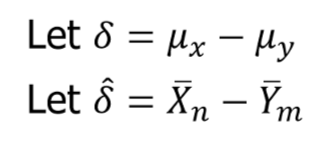


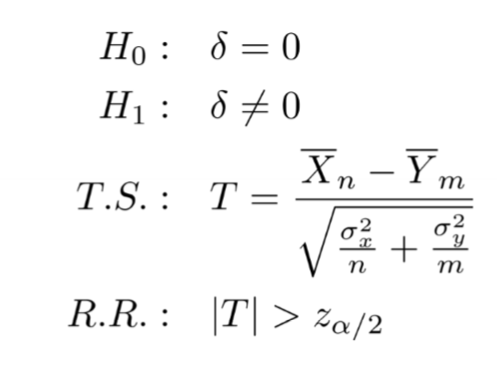

In [64]:
a = df.groupby(['sex']).mean().iloc[:,-1]
b = df.groupby(['sex']).std().iloc[:,-1]
n1 = len(df[df['sex'] == 'male'])
n0 = len(df[df['sex'] == 'female'])
t = (a[1]-a[0])/np.sqrt((b[0]/np.sqrt(n0))**2 + (b[1]/np.sqrt(n1))**2)
print(f'The value of W is {t:.2f}')
print(f'beacuse {t:.2f} > 1.96: we reject the H_O')

The value of W is 4.80
beacuse 4.80 > 1.96: we reject the H_O


ע"פ מבחן וולד ניתן לדחות את השערת האפס ולקבוע כי הממוצעים שונים זה מזה.


In [66]:
df = df_athletes[['sex','BMI']].copy()
df.drop(df.index[df.isnull().any(axis=1)],0, inplace=True)
n = 200
seed = 985789
np.random.seed(seed)
a = np.random.choice(len(df), n, replace=False)
df = df.iloc[a,:]
arr = df.to_numpy()
arr[arr[:,0]=='male',0] = 1
arr[arr[:,0]=='female',0] = 0
mean_1 = arr[np.where(arr[:,0] == 1),1].mean()
mean_0 = arr[np.where(arr[:,0] == 0),1].mean()
delta = mean_1 - mean_0
count = 0
repeat = 10000
max_delta = 0
delta_vec = np.zeros([repeat,3])
for i in range(repeat):
    a = np.random.choice(np.arange(len(arr)),len(arr[arr[:,0] == 1,:]),replace = False) # sample for target 1
    b = np.delete(np.arange(len(arr)), a, 0) # sample for target 0

    delta_vec[i,1] = arr[a,1].mean()
    delta_vec[i,0] = arr[b,1].mean()
    delta_vec[i,2] = delta_vec[i,1] - delta_vec[i,0]

In [67]:
print(f'{(sum(delta_vec[:,2] >= delta)/repeat):.6f}')

0.000000


במבחן הפרמוטציות מתקבל ש-0.000001 מהמדגמים מתקבל הפרש ממוצעים גדול יותר מהפרש הממוצעים המקורי.
ע"פ תוצאה זו ניתן לקבוע כי אפשר לדחות את השערת האפס.

אציין כי אני חושב שתוצאה זו הינה לא הגיונית והייתי צופה שיהיו יותר מדגמים עם הפרש ממוצעים כגול יותר מההפרש המקורי.
ניסיתי לבד, וגם בהנחייתו של אורון למצוא את הבעיה בקוד ולא הצלחתי.


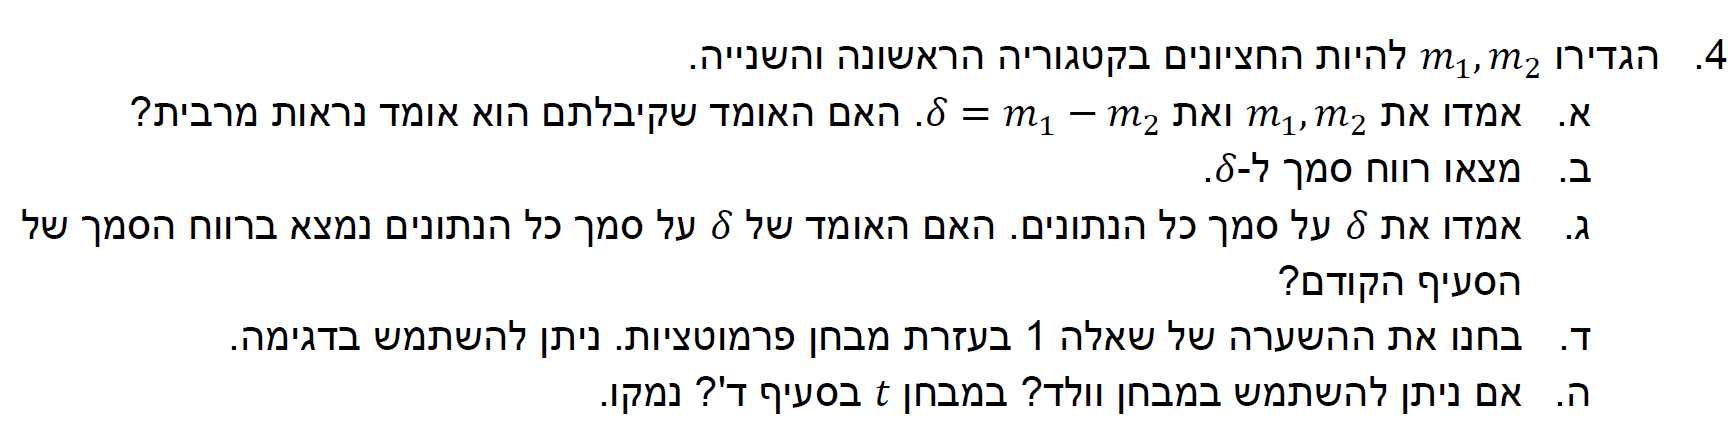

In [68]:
df = df_athletes[['sex','BMI']].copy()
df.drop(df.index[df.isnull().any(axis=1)],0, inplace=True)
n = 200
seed = 985789
np.random.seed(seed)
a = np.random.choice(len(df), n, replace=False)
df = df.iloc[a,:]

In [69]:
print('Median of male and female of BMI:')
median = df.groupby(['sex']).median().loc[:,'BMI']
print(f'male: {median[1]:.2f}')
print(f'female: {median[0]:.2f}')
print('')

delta = median[1] - median[0]
print('diffrence of means for sample:')
print(delta)
arr = df.to_numpy()
arr[arr[:,0]=='male',0] = 1
arr[arr[:,0]=='female',0] = 0
B = 1000
delta = np.zeros([1000])

for i in range(B):
    a = np.random.choice(list(range(len(arr))),len(arr))
    arr_bs = arr[a]
    
    mask = np.where(arr_bs[:,0] == 1)
    median_1 = np.median(arr_bs[mask,1])

    mask = np.where(arr_bs[:,0] == 0)
    median_0 = np.median(arr_bs[mask,1])
    
    delta[i] = median_1 - median_0
    
minimum = 2.5
maximum = 97.5
print(f'CI: [{np.percentile(delta[:],minimum):.2f}, {np.percentile(delta[:],maximum):.2f}]')

print('Median of male and female of BMI:')
median = df_athletes.groupby(['sex']).median().loc[:,'BMI']
print(f'male: {median[1]:.2f}')
print(f'female: {median[0]:.2f}')
print('')

delta = median[1] - median[0]
print('diffrence of means for population:')

print(delta)

Median of male and female of BMI:
male: 23.29
female: 20.96

diffrence of means for sample:
2.333955753833486
CI: [1.72, 3.11]
Median of male and female of BMI:
male: 23.53
female: 21.23

diffrence of means for population:
2.3032230582139235


רווח הסמך להפרש החציונים חושב ע"פ בוטסטראפ של 1000
ברווח חושב בשיטת באחוזונים

ניתן לראות שרווח הסמך מכיל את מכיל את הפרש החציונים על העולם האמיתי (אוכלוסייה)
האומד אינו אומד נראות מרבית כי לחציון אין אומד נראות מרבית

In [70]:
arr = df.to_numpy()
arr[arr[:,0]=='male',0] = 1
arr[arr[:,0]=='female',0] = 0

mask = np.where(arr[:,0] == 1)
median_1 = np.median(arr[mask,1])

mask = np.where(arr[:,0] == 0)
median_0 = np.median(arr[mask,1])

delta = median_1 - median_0

count = 0
repeat = 10000
max_delta = 0

for i in range(repeat):
    a = np.random.choice(np.arange(len(arr)),len(arr[arr[:,0] == 1,:]),replace = False)
    b = np.delete(np.arange(len(arr)), a, 0)
    median_1 = np.median(arr[a,1])
    median_0 = np.median(arr[b,1])
    max_delta = max(max_delta, abs(median_0 - median_1))

    if abs(median_0 - median_1) > delta:
        count+=1



In [71]:
print(f'{(count/repeat)*100:.6f}%')       
delta, count, count/repeat, max_delta

0.000000%


(2.333955753833486, 0, 0.0, 1.5767581542420892)

ניתן לראות כי אף מדגם פרמוטציות לא הגיע להפרש ממוצע חציונים גדול מהפרש ממוצע החציונים המקורי.

גם כאן אני מעריך שישנה בעיה בקוד (ראה הערתי מקודם)


במבחן t 

ישנה בעיה להשתמש בגלל שהמבחן דורש הנחה של התפלגות נורמלית על נקודות המדגם וכן על הסטטיסטי

גם במבחן וולד אני מעריך שלא ניתן להשתמש כי הנחות המבחן הינם שישנה התםלגות נורמלית של הסטטיסטי, מה שלא מתקיים כאן.


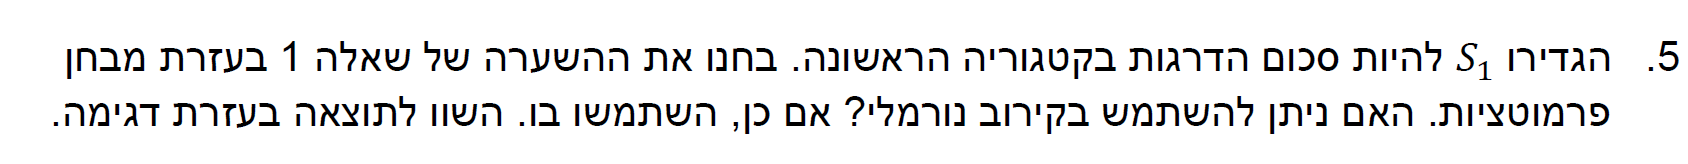

In [72]:
df = df.sort_values(by=['BMI'])
arr = df.to_numpy()
arr[:,1] = np.arange(len(arr))
arr[arr[:,0]=='male',0] = 1
arr[arr[:,0]=='female',0] = 0
mask1 = np.where(arr[:,0] == 1)
mask0 = np.where(arr[:,0] == 0)
W1 = sum(sum(arr[mask1,1]))
W0 = sum(sum(arr[mask0,1]))

E_W = 0.5*len(mask1[0])*(len(arr)+1)
V_Ws = (1/12)*(len(mask1[0])*len(mask0[0])*(len(arr)+1))
print(f'Ws = {W1}')
print(f'E[Ws] = {E_W}')
print(f'Var[Ws] = {V_Ws}')
print(f'T.S.: T = {(W1-E_W)/np.sqrt(V_Ws):.3f}')

Ws = 13645
E[Ws] = 11155.5
Var[Ws] = 165473.25
T.S.: T = 6.120


ניתן להשתמש בקירוב הנורמלי מכיוון שאין לנו דרגות תיקו - אפשר להשתמש בהנחת סימטריה

ע"פ הקירוב הנורמלי, מכיוון שה-טי שווה ל-6.120 ניתן לדחות באופן מובהק את השערת ה-0

In [73]:
count = 0
repeat = 10000

for i in range(repeat):
    a = np.random.choice(np.arange(len(arr)),len(arr[arr[:,0]==1,:]),replace = False)
    b = np.delete(np.arange(len(arr)), a, 0)
#     print(sum(a))
    if sum(arr[a,1]) >= W1:
        count+=1

print(f'{(count/repeat)*100:.7f}%')       
count, count/repeat

0.0000000%


(0, 0.0)

- גם במחן הפרמוטצית למבחן ווילקוקסון התקבל שאף מדגם פרמוטציות לא עלה במספר הדרגות על מספר הדרגות במדגם המקורי.

- התקבלה אותה מסקנה ביחס לקירוב הנורמלי שנעשה

#### סיכום ההבדלים בין הקבוצות השונות במדגם ע"פ בחינת סטטיסטים שונים (ממוצע, חציון, מספר הדרגות)

- בבחינה של כל הסטטיסטים התקבל כי ניתן לדחות את השערת ה-0- 
- גם כאשר בחנתי את הפרשי הממוצעים עם מבחן וולד התקבלה מסקנה זהה.
- בבחינת סכום הדרגות התקבלה מסקנה זהה גם ע"י קירוב לנורמלי וגם ע"י ביצוע דגימה
- במבחני הפרמוטציות בוצעו כ-1000000 פרמוטציות למדגם
- נראה שלמבחני הפרמוטציות כוח רב, בייחוד כאשר מחפשים סטטיסטיים שלא ניתן למצוא אותם בדרכים אחרות



## part 5

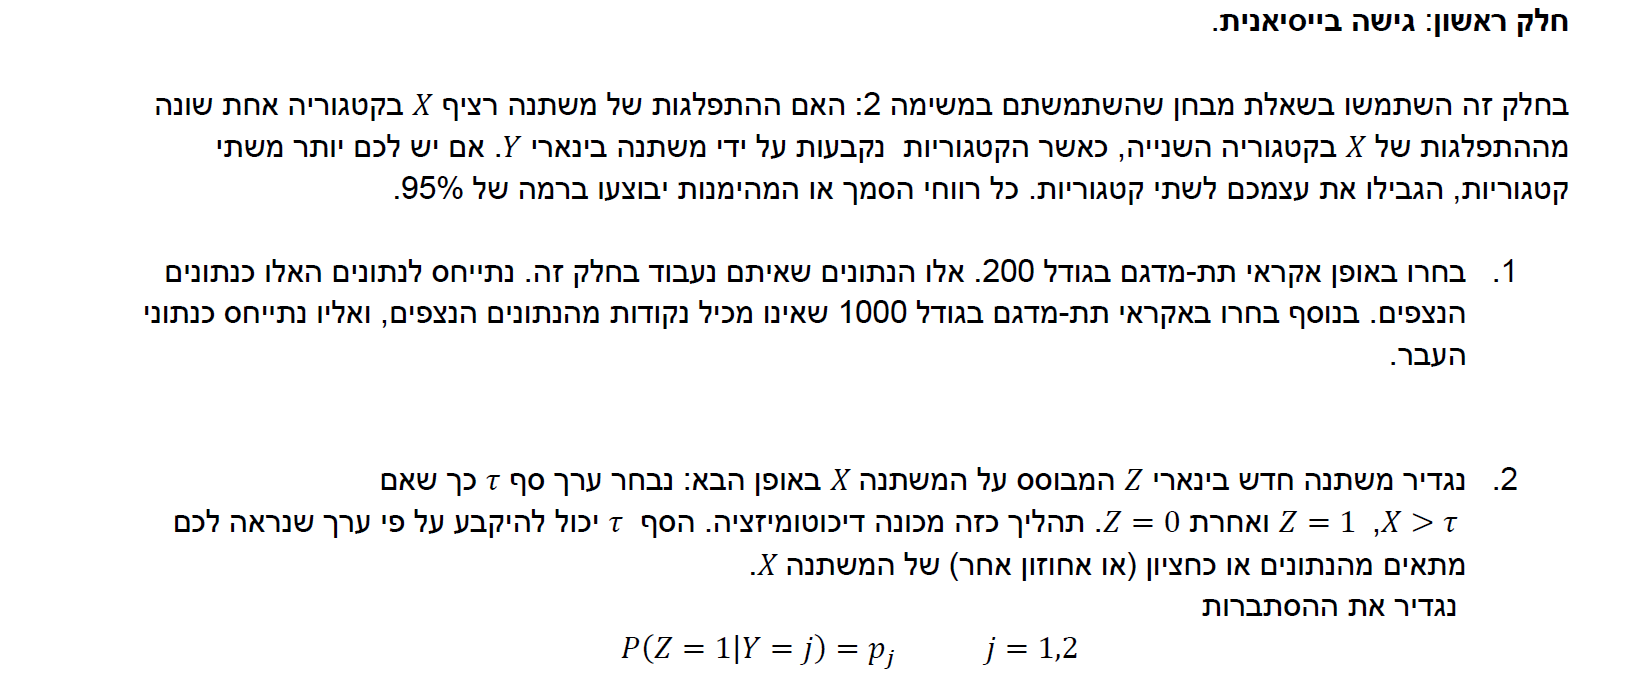


### defination of sample (200 points data) and past data (2000 points data)

In [322]:
df = df_athletes[['sex','BMI']].copy()
df.drop(df.index[df.isnull().any(axis=1)],0, inplace=True)
n = 1000 + 200
seed = 985789
np.random.seed(seed)
a = np.random.choice(len(df), n, replace=False)
df = df.iloc[a,:]
df_sample = df.iloc[:200,:]
df_past_data = df.iloc[200:,:]
df_sample, df_past_data

(          sex        BMI
 5921     male  24.280264
 5925     male  22.832879
 10381  female  21.146320
 4863     male  25.680074
 2379     male  24.414062
 ...       ...        ...
 1275   female  19.943213
 2907   female  19.140625
 10587  female  16.866251
 2617     male  21.146320
 8371   female  17.630854
 
 [200 rows x 2 columns],
           sex        BMI
 5908   female  20.028842
 8868     male  24.618104
 9995   female  20.239501
 2511     male  27.664399
 10850  female  19.591837
 ...       ...        ...
 6135   female  22.222222
 4840   female  21.773842
 6715   female  20.049880
 10061    male  25.359256
 7356     male  20.824656
 
 [1000 rows x 2 columns])

In [323]:
threshold = df_sample.BMI.median()
print(threshold)

22.33054963947331


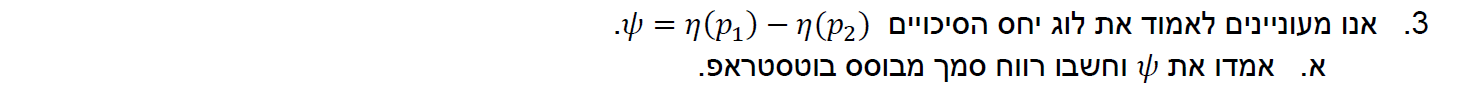

In [324]:
X = df_sample.BMI
Y = df_sample.sex
Z = X > X.median()

count = 0
for i in range(len(Y)):
    if (Y.iloc[i] == 'male' and Z.iloc[i] == True): 
        count +=1
x = count/sum(Y == 'male')
print(x, count, sum(Y == 'male'))
log_eta_p1 = math.log(x/(1-x))

count = 0
for i in range(len(Y)):
    if (Y.iloc[i] == 'female' and Z.iloc[i] == True): 
        count +=1
x = count/sum(Y == 'female')
print(x, count, sum(Y == 'female'))

log_eta_p2 = math.log(x/(1-x))


psi = log_eta_p1-log_eta_p2
print('estimator of psi:',psi)

B = 1000
psi_list = []
for i in range(B):
        a = np.random.choice(list(range(len(df_sample))),len(df_sample))
        df_sample_BS = df_sample.iloc[a,:].copy()
        X = df_sample_BS.BMI
        Y = df_sample_BS.sex
        Z = X > X.median()
        count = 0
        for i in range(len(Y)):
            if (Y.iloc[i] == 'male' and Z.iloc[i] == True): 
                count +=1
        x = count/sum(Y == 'male')
#         print(x, count, sum(Y == 'male'))
        log_eta_p1 = math.log(x/(1-x))

        count = 0
        for i in range(len(Y)):
            if (Y.iloc[i] == 'female' and Z.iloc[i] == True): 
                count +=1
        x = count/sum(Y == 'female')
#         print(x, count, sum(Y == 'female'))

        log_eta_p2 = math.log(x/(1-x))


#          = log_eta_p1-log_eta_p2
        psi_list.append(log_eta_p1-log_eta_p2)
        
minimum = 2.5
maximum = 97.5
original = {'psi': psi, 'CI': [np.percentile(psi_list,minimum),np.percentile(psi_list,maximum)]}
print(f'CI: [{np.percentile(psi_list,minimum):.2f}, {np.percentile(psi_list,maximum):.2f}]')

0.6936936936936937 77 111
0.25842696629213485 23 89
estimator of psi: 1.8716054233347985
CI: [1.31, 2.60]


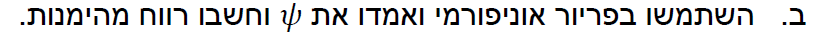

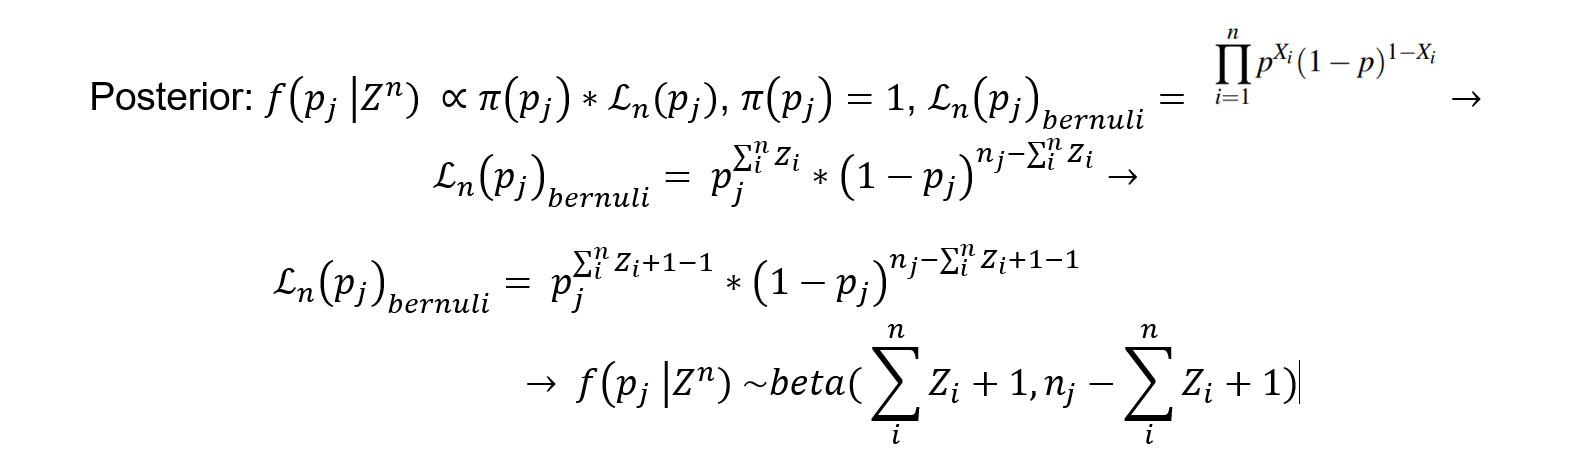

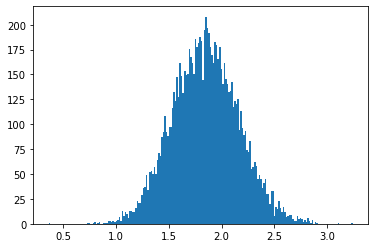

You can see that the distribution is normal
estimator: 1.85; CI based percentage:  [1.252,2.48]


In [325]:
# for p1
B = 10000
psi_list = []
for i in range(B):
    a = 77+1
    b = 111-77+1
    x = np.random.beta(a, b)
    # mean, var, skew, kurt = beta.stats(a2, b2, moments='mvsk')
    log_eta_p1 = math.log(x/(1-x))

    # for p2
    a = 23 + 1 
    b = 89 - 23 + 1

    x = np.random.beta(a, b)
    log_eta_p2 = math.log(x/(1-x))

    psi_list.append(log_eta_p1-log_eta_p2)
    
plt.hist(psi_list, bins = int(B/50))
plt.show()   
print('You can see that the distribution is normal')
uni_prior = {'psi': np.mean(psi_list), 'CI': [np.percentile(psi_list,2.5),np.percentile(psi_list,97.5)]}

print(f'estimator: {np.mean(psi_list):.2f}; CI based percentage:  [{np.percentile(psi_list, 2.5):.3f},{np.percentile(psi_list, 97.5):.2f}]')

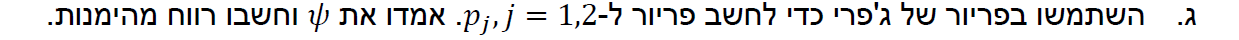

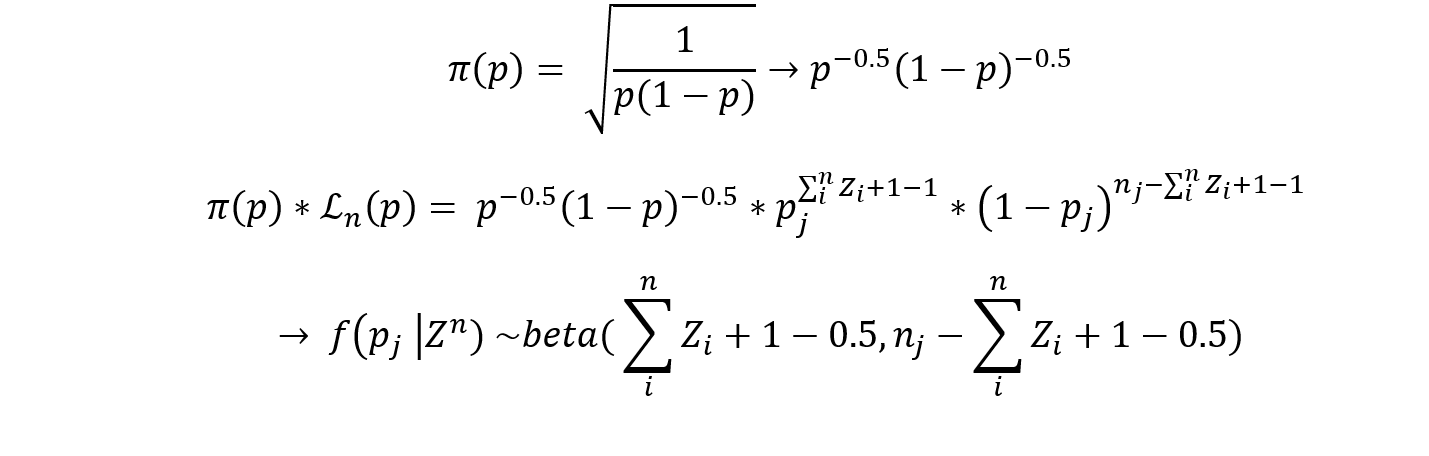

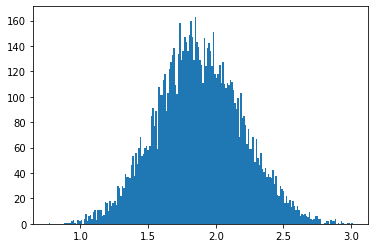

You can see that the distribution is normal
estimator: 1.88; CI based percentage:  [1.275,2.51]


In [326]:
# for p1
B = 10000
psi_list = []
for i in range(B):
    a = 77+1-0.5
    b = 111-77+1-0.5
    x = np.random.beta(a, b)
    # mean, var, skew, kurt = beta.stats(a2, b2, moments='mvsk')
    log_eta_p1 = math.log(x/(1-x))

    # for p2
    a = 23 + 1 -0.5
    b = 89 - 23 + 1 -0.5

    x = np.random.beta(a, b)
    # mean, var, skew, kurt = beta.stats(a2, b2, moments='mvsk')
    log_eta_p2 = math.log(x/(1-x))

    psi_list.append(log_eta_p1-log_eta_p2)
    
plt.hist(psi_list, bins = int(B/50))
plt.show()   
print('You can see that the distribution is normal')
jefri_prior = {'psi': np.mean(psi_list), 'CI': [np.percentile(psi_list,2.5),np.percentile(psi_list,97.5)]}

print(f'estimator: {np.mean(psi_list):.2f}; CI based percentage:  [{np.percentile(psi_list, 2.5):.3f},{np.percentile(psi_list, 97.5):.2f}]')

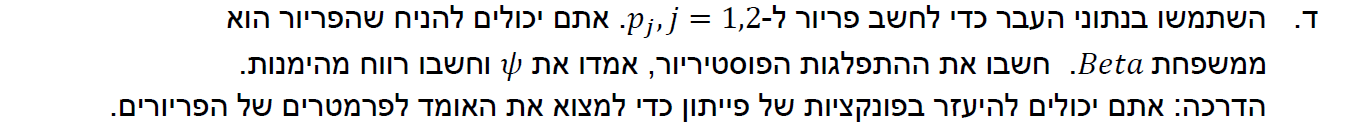

In [348]:
from scipy.stats import beta
X = df_past_data.BMI
Y = df_past_data.sex
Z = X > X.median()

X1 = df_past_data.query('sex == "male"').values[:,1].astype(np.float64)
X2 = df_past_data.query('sex == "female"').values[:,1].astype(np.float64)

Z1 = X1 > X.median()
Z2 = X2 > X.median()
Z2,Z2

al1,be1,_,_ = beta.fit(Z1)
al2,be2,_,_ = beta.fit(Z2)

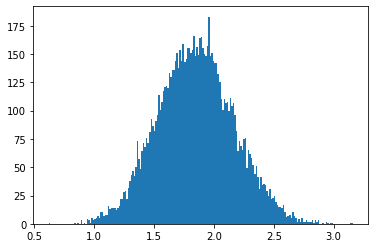

You can see that the distribution is normal
estimator: 1.85; CI based percentage:  [1.245,2.49]


In [349]:
# for p1
B = 10000
psi_list = []
for i in range(B):
    a = 77+1+al1
    b = 111-77+1+be1
    x = np.random.beta(a, b)
    # mean, var, skew, kurt = beta.stats(a2, b2, moments='mvsk')
    log_eta_p1 = math.log(x/(1-x))

    # for p2
    a = 23 + 1 + al2
    b = 89 - 23 + 1 + be2

    x = np.random.beta(a, b)
    # mean, var, skew, kurt = beta.stats(a2, b2, moments='mvsk')
    log_eta_p2 = math.log(x/(1-x))
    psi_list.append(log_eta_p1-log_eta_p2)

    
plt.hist(psi_list, bins = int(B/50))
plt.show()   
print('You can see that the distribution is normal')
past_data_prior = {'psi': np.mean(psi_list), 'CI': [np.percentile(psi_list,2.5),np.percentile(psi_list,97.5)]}

print(f'estimator: {np.mean(psi_list):.2f}; CI based percentage:  [{np.percentile(psi_list, 2.5):.3f},{np.percentile(psi_list, 97.5):.2f}]')

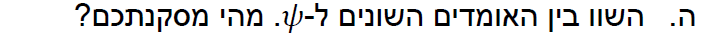

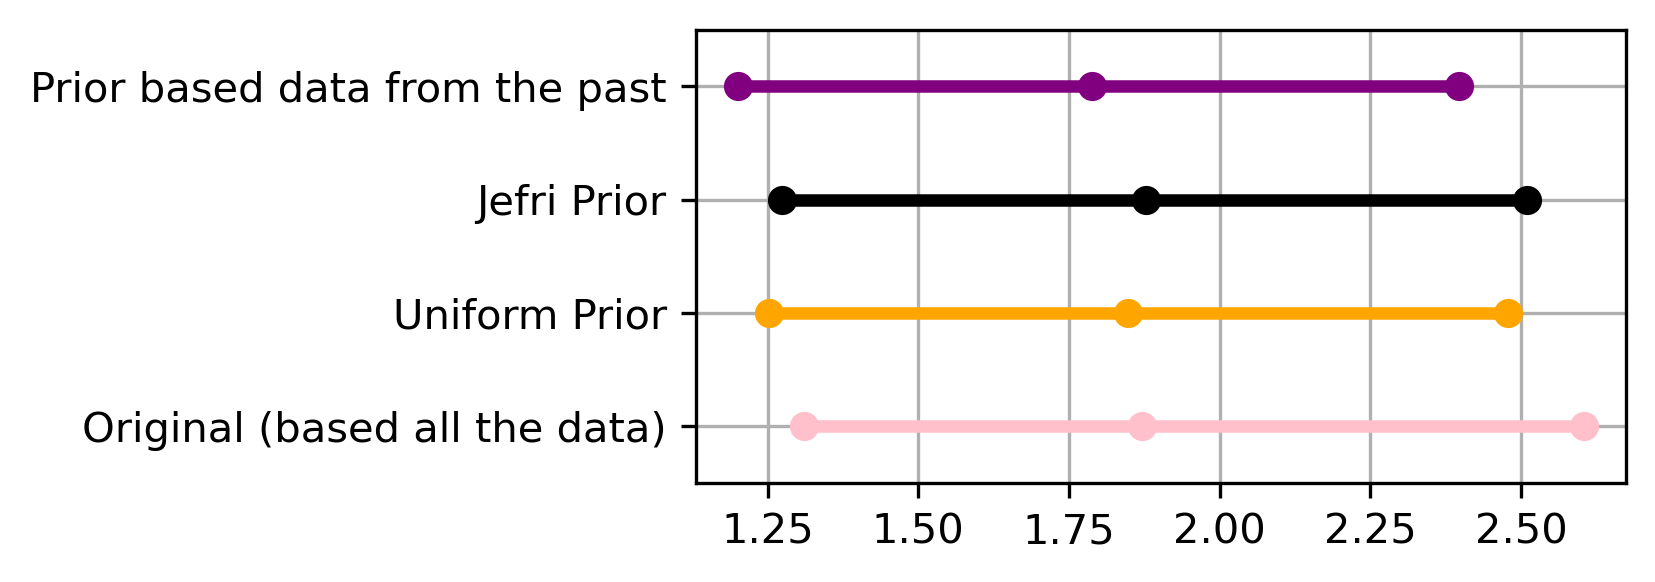

In [329]:
data_dict = {}
data_dict['category'] = [
        'Original (based all the data)',
        'Uniform Prior',
        'Jefri Prior',
        'Prior based data from the past',
]
data_dict['lower'] = [
        original['CI'][0],
        uni_prior['CI'][0],
        jefri_prior['CI'][0],
        past_data_prior['CI'][0],
]

data_dict['upper'] = [
        original['CI'][1],
        uni_prior['CI'][1],
        jefri_prior['CI'][1],
        past_data_prior['CI'][1],
]

data_dict['estimator'] = [
        original['psi'],
        uni_prior['psi'],
        jefri_prior['psi'],
        past_data_prior['psi'],
]

dataset = pd.DataFrame(data_dict)
color = ['pink','orange','black','purple']
plt.figure(figsize=(4,2),dpi = 300)    

for lower,upper,est,y in zip(dataset['lower'],dataset['upper'],dataset['estimator'],range(len(dataset))):
    plt.plot((lower,est,upper),(y,y,y),'ro-',color=color[y],linewidth=3)
plt.yticks(range(len(dataset)),list(dataset['category']))

# plt.title(f'{sel[i].capitalize()}')
plt.ylim([-0.5,3.5])
plt.grid('on')
plt.show()

#### השוואה וסיכום

1. ניתן לראות כי לוג יחס הסיכויים המבוסס על הדאטה באופן פשוט הוא יחסית מובהק על ההבדל בין שתי הקבוצות
2. נראה כי גם בשיטות הבייסיאניות השונות התקבלו ערכים דומים עם רווחי סמך דומים לערך הנבחן
3. הפריור של ג'פרי היה הקרוב ביותר לערך ולרווח סמך המקוריים

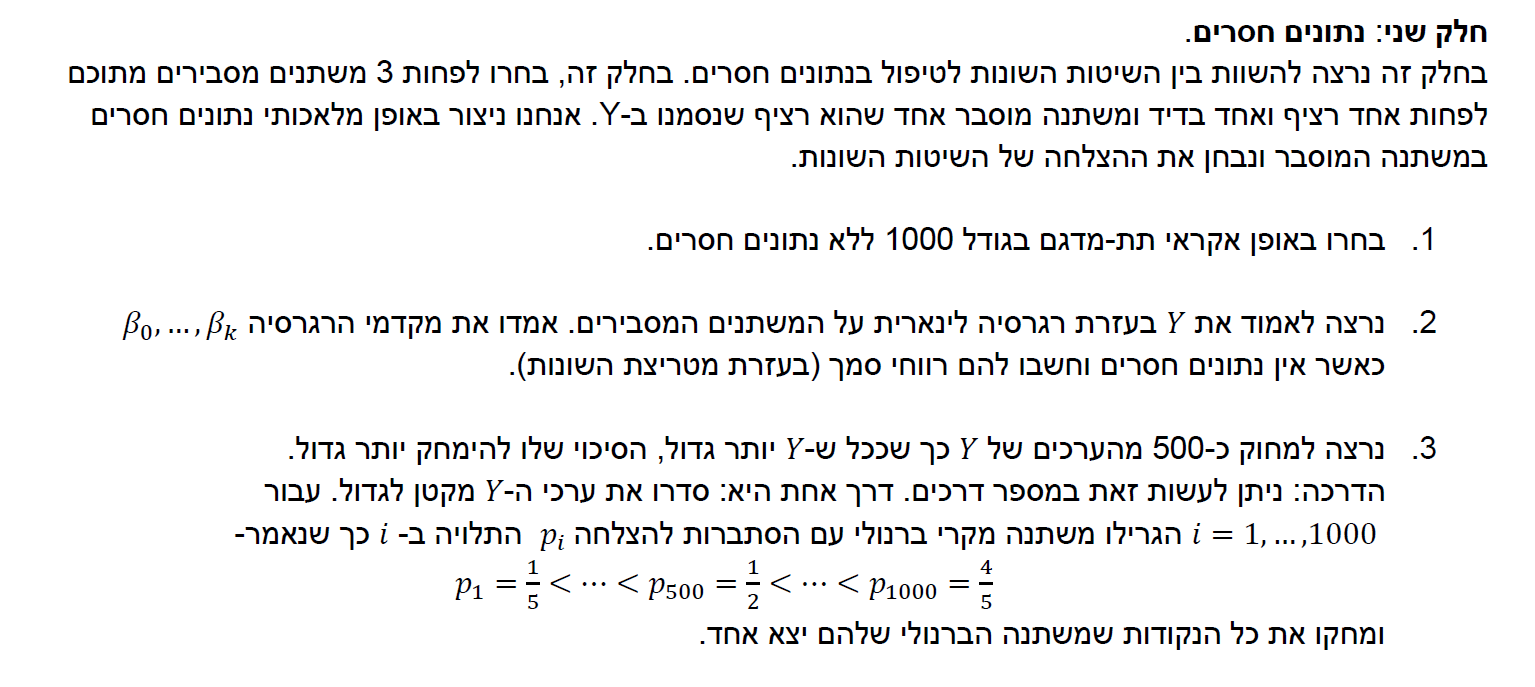

#### 1 

In [330]:
df_athletes.drop(df_athletes.index[df_athletes.isnull().any(axis=1)],0, inplace=True)
n = 1000
seed = 985789
np.random.seed(seed)
a = np.random.choice(len(df_athletes), n, replace=False)
sel = [1,2,3,4]
df = df_athletes.iloc[a,sel]
df

,sex,height,weight,sport
5921,male,1.86,84.0,aquatics
5925,male,1.58,57.0,wrestling
10381,female,1.78,67.0,table tennis
4863,male,1.83,86.0,rowing
2379,male,1.92,90.0,aquatics
...,...,...,...,...
9406,female,1.74,66.0,hockey
6709,male,1.74,66.0,table tennis
3337,male,1.69,69.0,shooting
10545,male,1.90,92.0,rowing


#### 2 

In [331]:
n = 11
labels = df['sport'].value_counts()[:n].index.tolist()
count = df['sport'].value_counts()[:n].tolist()

for i in range(len(df)):
    if labels.count(df['sport'].iloc[i]) == 0:
        df['sport'].iloc[i] = 'other'
        
labels = df['sport'].value_counts()[:n].index.tolist()
# for i in range(len(df)):
#     if labels.count(df['sport'].iloc[i]) == 0:
#         df['sport'].iloc[i] = 'other'
df.drop(df.index[df.isnull().any(axis=1)],0, inplace=True)
sport = pd.get_dummies(df.sport)
sex = pd.get_dummies(df.sex)
df_d = pd.concat([df.height,df.weight,sex, sport], axis=1)

labels.append( 'weight')
labels.append( 'male')

sel = labels[1:]
df_x = df_d.loc[:,sel]
Y = np.array(df_d.height)
X = np.array(df_x)
X = np.concatenate([np.ones([(X.shape[0]),1]),X], axis = 1)

XT_dot_X = np.matmul(X.transpose(), X) # X*X_T
XT_dot_X_inv = np.linalg.inv(XT_dot_X)

beta_kova = np.matmul(np.matmul(XT_dot_X_inv, X.transpose()), Y) 
Y_mean = sum(Y)/len(Y)
SST = sum([(t-Y_mean)**2 for t in Y])
Y_hat = np.dot(X, beta_kova)
e = np.subtract(Y,Y_hat)
Y_hat_200 = Y_hat
e_200 = e
SS_res = sum([k**2 for k in e])
n = len(Y)
MS_res = SS_res/(n-X.shape[1]-1)

data = pd.DataFrame(columns= ['SS','df','MS', 'F_ratio', 'P_value'], index=['Reg', 'Res', 'Total'])
data.SS[1] = SST
data.SS[1] = SS_res
data.SS[0] = SST - SS_res
data.df = [X.shape[1], X.shape[0]-X.shape[1]-1,X.shape[0]-1]
data.MS = data.SS/data.df
data.loc['Reg','F_ratio'] = (data.MS['Reg']/data.MS['Res'])

R_2 = 1 - (data.SS['Res']/data.SS['Total'])
R_2_adj = 1 - (1-R_2)*((X.shape[0]-1)/(X.shape[0]-X.shape[1]-1))
F_stat = stat.f.ppf(q=1-0.05, dfn=X.shape[1], dfd=X.shape[0]-X.shape[1]-1)
p_value =  1-stat.f.cdf(data.loc['Reg','F_ratio'], dfn=X.shape[1], dfd=X.shape[0]-X.shape[1]-1)
data.loc['Reg','P_value'] = p_value
# calculate CI
CI = np.zeros([len(beta_kova[1:]),2])
CI[:,0] = beta_kova[1:]
for i in range(1, len(beta_kova)):
    CI[i-1,1] = 1.96 * data.loc['Reg','MS'] * XT_dot_X_inv[i,i]
    
print()
print('Numerical variable:')
print()
print(f'An increase in one unit of *{sel[-1]}* will cause to enlarge of {beta_kova[-1]:.3f} in the value of height')
print()
print('Categorial variables:')
print()
print(f'If the sex of the athlete is male, The value of the height will increase by {beta_kova[-1]:.3f}')
beta0 = beta_kova[1:-1]
for i in range(len(beta0)):
    if beta0[i] > 0:
        print(f'If the athlete competes in the *{sel[i]}*, the height value will increase by {beta0[i]:.3f}')
    if beta0[i] < 0:
        print(f'If the athlete competes in the *{sel[i]}*, the height value will decrease by {beta0[i]:.3f}')
print()        
for i in range(1,len(beta_kova)):
    lower = CI[i-1,0] - CI[i-1,1]
    upper = CI[i-1,0] + CI[i-1,1]
    c = beta_kova[i] 
    print(f'[{lower:.5f} < {c:.5f} < {upper:.5f}] CI of {sel[i-1]}')
#     if c < lower: print(f' -> beta of {sel[i-1]} is not in CI')
#     if c > upper: print(f' -> beta of {sel[i-1]} is not in CI')
CI_original = CI.copy()
beta_original = beta_kova.copy()
sel_original = sel.copy()


Numerical variable:

An increase in one unit of *male* will cause to enlarge of 0.057 in the value of height

Categorial variables:

If the sex of the athlete is male, The value of the height will increase by 0.057
If the athlete competes in the *athletics*, the height value will increase by 0.032
If the athlete competes in the *aquatics*, the height value will increase by 0.059
If the athlete competes in the *football*, the height value will increase by 0.010
If the athlete competes in the *rowing*, the height value will increase by 0.081
If the athlete competes in the *handball*, the height value will increase by 0.058
If the athlete competes in the *canoe*, the height value will increase by 0.025
If the athlete competes in the *volleyball*, the height value will increase by 0.135
If the athlete competes in the *sailing*, the height value will increase by 0.030
If the athlete competes in the *basketball*, the height value will increase by 0.125
If the athlete competes in the *cyclin

#### 3

In [332]:
df_athletes.drop(df_athletes.index[df_athletes.isnull().any(axis=1)],0, inplace=True)
n = 1000
seed = 985789
np.random.seed(seed)
a = np.random.choice(len(df_athletes), n, replace=False)
sel = [1,2,3,4]
df = df_athletes.iloc[a,sel]
print(df.sort_values('height'))

seed = 985789
np.random.seed(seed)
chance = np.random.random_sample((1000))

df.sort_values('height')
df_nan = df.sort_values('height').copy()

seed = 98698
np.random.seed(seed)
chance = np.random.random_sample((1000))

chance_weight = np.arange(0.0,0.99999,.001)
for i in range(1000):
    if chance[i] < chance_weight[i]:
        df_nan.height.iloc[i] = math.nan
sum(df_nan.height.isna())


df_w_o_nan = df_nan.copy()
df_w_o_nan.drop(df_nan.index[df_nan.isnull().any(axis=1)],0, inplace=True)

          sex  height  weight          sport
6771   female    1.50    44.0      athletics
2588   female    1.51    53.0  weightlifting
9534   female    1.51    43.0       shooting
10728  female    1.52    48.0           judo
3449     male    1.53   125.0      wrestling
...       ...     ...     ...            ...
2446     male    2.10   102.0     basketball
2511     male    2.10   122.0     basketball
2868     male    2.10   100.0     basketball
2510     male    2.11   120.0     basketball
7606     male    2.13   121.0     basketball

[1000 rows x 4 columns]


In [333]:
def lin_reg(df):
    n = 11
    labels = df['sport'].value_counts()[:n].index.tolist()
    count = df['sport'].value_counts()[:n].tolist()
    for i in range(len(df)):
        if labels.count(df['sport'].iloc[i]) == 0:
            df['sport'].iloc[i] = 'other'

    labels = df['sport'].value_counts()[:n].index.tolist()
    sport = pd.get_dummies(df.sport)
    sex = pd.get_dummies(df.sex)
    df_d = pd.concat([df.height,df.weight,sex, sport], axis=1)
    labels.append( 'weight')
    labels.append( 'male')
    sel = labels[1:]
    df_x = df_d.loc[:,sel]
    Y = np.array(df_d.height)
    X = np.array(df_x)
    X = np.concatenate([np.ones([(X.shape[0]),1]),X], axis = 1)

    XT_dot_X = np.matmul(X.transpose(), X) # X*X_T
    XT_dot_X_inv = np.linalg.inv(XT_dot_X)

    beta_kova = np.matmul(np.matmul(XT_dot_X_inv, X.transpose()), Y) 
    Y_mean = sum(Y)/len(Y)
    SST = sum([(t-Y_mean)**2 for t in Y])
    Y_hat = np.dot(X, beta_kova)
    e = np.subtract(Y,Y_hat)
    Y_hat_200 = Y_hat
    e_200 = e
    SS_res = sum([k**2 for k in e])
    n = len(Y)
    MS_res = SS_res/(n-X.shape[1]-1)

    data = pd.DataFrame(columns= ['SS','df','MS', 'F_ratio', 'P_value'], index=['Reg', 'Res', 'Total'])
    data.SS[1] = SST
    data.SS[1] = SS_res
    data.SS[0] = SST - SS_res
    data.df = [X.shape[1], X.shape[0]-X.shape[1]-1,X.shape[0]-1]
    data.MS = data.SS/data.df
    data.loc['Reg','F_ratio'] = (data.MS['Reg']/data.MS['Res'])
    return X, Y, beta_kova, data, XT_dot_X_inv, sel

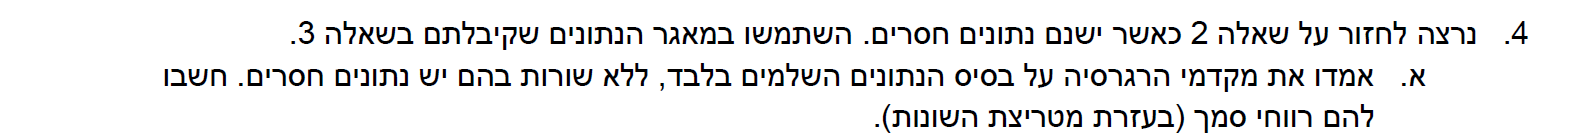

In [334]:
X, Y, beta_kova, data, XT_dot_X_inv, sel = lin_reg(df_w_o_nan)
R_2 = 1 - (data.SS['Res']/data.SS['Total'])
R_2_adj = 1 - (1-R_2)*((X.shape[0]-1)/(X.shape[0]-X.shape[1]-1))
F_stat = stat.f.ppf(q=1-0.05, dfn=X.shape[1], dfd=X.shape[0]-X.shape[1]-1)
p_value =  1-stat.f.cdf(data.loc['Reg','F_ratio'], dfn=X.shape[1], dfd=X.shape[0]-X.shape[1]-1)
data.loc['Reg','P_value'] = p_value
# calculate CI
CI = np.zeros([len(beta_kova[1:]),2])
CI[:,0] = beta_kova[1:]
for i in range(1, len(beta_kova)):
    CI[i-1,1] = 1.96 * data.loc['Reg','MS'] * XT_dot_X_inv[i,i]
    
       
for i in range(1,len(beta_kova)):
    lower = CI[i-1,0] - CI[i-1,1]
    upper = CI[i-1,0] + CI[i-1,1]
    c = beta_kova[i] 
    print(f'[{lower:.5f} < {c:.5f} < {upper:.5f}] CI of {sel[i-1]}')
    
CI_only_fill = CI.copy()
beta_only_fill = beta_kova.copy()
sel_only_fill = sel.copy()

[0.00841 < 0.01332 < 0.01823] CI of athletics
[0.02134 < 0.02782 < 0.03431] CI of aquatics
[-0.02249 < -0.01209 < -0.00168] CI of football
[-0.06619 < -0.05225 < -0.03831] CI of shooting
[-0.04294 < -0.02769 < -0.01244] CI of gymnastics
[-0.00955 < 0.00556 < 0.02068] CI of cycling
[-0.00534 < 0.01024 < 0.02581] CI of sailing
[-0.04557 < -0.02821 < -0.01086] CI of rugby sevens
[-0.02413 < -0.00713 < 0.00987] CI of hockey
[-0.09055 < -0.07305 < -0.05554] CI of wrestling
[0.00411 < 0.00411 < 0.00412] CI of weight
[0.03065 < 0.03412 < 0.03760] CI of male


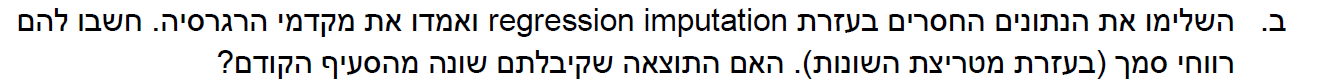

In [335]:
X, Y, _, _,_, sel = lin_reg(df_nan)
Y_hat = np.dot(X, beta_kova)
df_nan.height[df_nan.height.isnull()] = Y_hat[df_nan.height.isnull()]

X, Y, beta_kova, data, XT_dot_X_inv, sel = lin_reg(df_nan) 
CI = np.zeros([len(beta_kova[1:]),2])
CI[:,0] = beta_kova[1:]
for i in range(1, len(beta_kova)):
    CI[i-1,1] = 1.96 * data.loc['Reg','MS'] * XT_dot_X_inv[i,i]
       
for i in range(1,len(beta_kova)):
    lower = CI[i-1,0] - CI[i-1,1]
    upper = CI[i-1,0] + CI[i-1,1]
    c = beta_kova[i] 
    print(f'[{lower:.5f} < {c:.5f} < {upper:.5f}] CI of {sel[i-1]}')
    
CI_with_nan = CI.copy()
beta_with_nan = beta_kova.copy()
sel_with_nan = sel.copy()

[0.02176 < 0.02873 < 0.03570] CI of athletics
[0.03518 < 0.04432 < 0.05347] CI of aquatics
[-0.01492 < 0.00344 < 0.02180] CI of football
[-0.03207 < -0.01171 < 0.00866] CI of rowing
[-0.01629 < 0.00730 < 0.03090] CI of handball
[-0.00542 < 0.01907 < 0.04356] CI of canoe
[0.01768 < 0.04328 < 0.06888] CI of volleyball
[-0.01566 < 0.00928 < 0.03421] CI of sailing
[-0.00491 < 0.02246 < 0.04983] CI of basketball
[-0.03576 < -0.00948 < 0.01679] CI of cycling
[0.00393 < 0.00394 < 0.00394] CI of weight
[0.03022 < 0.03550 < 0.04077] CI of male


התוצאה שהתקבלה שונה מהסעיף הקודם.

ניתן להיה לצפות שהמקדמים ורווחי הסמך יתקבלו זהים למקדמים רק על הנתנוים השלמים, כי ההשלמה היתה על קו הרגרסיה ללא שונות.



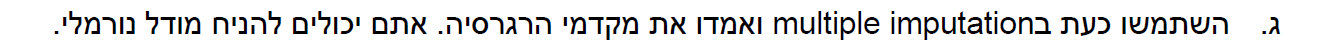

In [336]:
df_athletes.drop(df_athletes.index[df_athletes.isnull().any(axis=1)],0, inplace=True)
n = 1000
seed = 985789
np.random.seed(seed)
a = np.random.choice(len(df_athletes), n, replace=False)
sel = [1,2,3,4]
df = df_athletes.iloc[a,sel]
print(df.sort_values('height'))

seed = 985789
np.random.seed(seed)
chance = np.random.random_sample((1000))

df.sort_values('height')
df_nan = df.sort_values('height').copy()

seed = 98698
np.random.seed(seed)
chance = np.random.random_sample((1000))

chance_weight = np.arange(0.0,0.99999,.001)
for i in range(1000):
    if chance[i] < chance_weight[i]:
        df_nan.height.iloc[i] = math.nan
sum(df_nan.height.isna())


df_w_o_nan = df_nan.copy()
df_w_o_nan.drop(df_nan.index[df_nan.isnull().any(axis=1)],0, inplace=True)

X, Y, beta_kova, data, XT_dot_X_inv, sel = lin_reg(df_w_o_nan)
X, Y, _,_,_,_ = lin_reg(df_nan)


M = 1000
m_imput = np.zeros([len(df_nan), M])
s_e_coef = np.sqrt(data.loc['Reg','MS'] * np.diag(XT_dot_X_inv))
for i in range(M):
    Y_hat = np.dot(X, np.random.normal(beta_kova,s_e_coef))
    m_imput[:,i] = df_nan.height.values
    m_imput[:,i][df_nan.height.isnull()] = Y_hat[df_nan.height.isnull()]
    
for i in range(len(df_nan)):
    df_nan.height.iloc[i] = (m_imput[i,:]).mean()
    
X, Y, beta_kova, data, XT_dot_X_inv, sel = lin_reg(df_nan) 
CI = np.zeros([len(beta_kova[1:]),2])


for i in range(1,len(beta_kova)):
#     lower = CI[i-2,0] - CI[i-2,2]
#     upper = CI[i-2,0] + CI[i-2,2]
    c = beta_kova[i] 
    print(f'{c:.5f} is coef of {sel[i-1]}')
    
beta_for_multiple = beta_kova.copy()
sel_for_multiple = sel.copy()

          sex  height  weight          sport
6771   female    1.50    44.0      athletics
2588   female    1.51    53.0  weightlifting
9534   female    1.51    43.0       shooting
10728  female    1.52    48.0           judo
3449     male    1.53   125.0      wrestling
...       ...     ...     ...            ...
2446     male    2.10   102.0     basketball
2511     male    2.10   122.0     basketball
2868     male    2.10   100.0     basketball
2510     male    2.11   120.0     basketball
7606     male    2.13   121.0     basketball

[1000 rows x 4 columns]
0.02991 is coef of athletics
0.04355 is coef of aquatics
0.00527 is coef of football
-0.01091 is coef of rowing
0.00711 is coef of handball
0.01690 is coef of canoe
0.04644 is coef of volleyball
0.00973 is coef of sailing
0.01988 is coef of basketball
-0.01129 is coef of cycling
0.00393 is coef of weight
0.03570 is coef of male


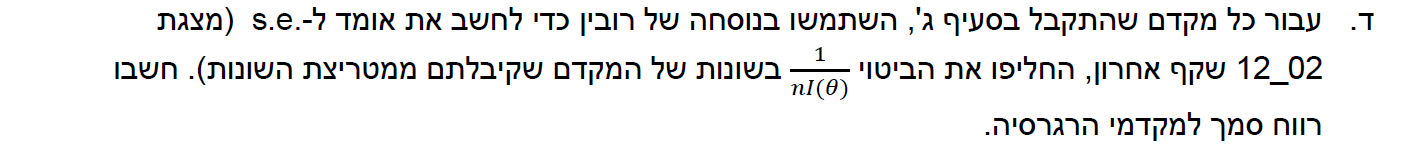

In [337]:
X, Y, beta_kova, data, XT_dot_X_inv, sel = lin_reg(df_w_o_nan)
X, Y, _,_,_,_ = lin_reg(df_nan)

M = 1000
m_imput = np.zeros([len(df_nan), M])
beta_kova_temp = np.zeros([len(beta_kova), M])
XT_dot_X_inv_temp = np.zeros([len(beta_kova), M])
s_e_coef = np.sqrt(data.loc['Reg','MS'] * np.diag(XT_dot_X_inv))
for i in range(M):
    df_nan_temp = df_nan.copy()
    Y_hat = np.dot(X, np.random.normal(beta_kova,s_e_coef))
    m_imput[:,i] = df_nan.height.values
    m_imput[:,i][df_nan.height.isnull()] = Y_hat[df_nan.height.isnull()]
    df_nan_temp.height.iloc[:] = (m_imput[:,i])
    _, _, beta_kova_temp[:,i], _, XT_dot_X_inv_temp0, _ = lin_reg(df_nan_temp) 
    XT_dot_X_inv_temp[:,i] = np.diag(XT_dot_X_inv_temp0)

In [338]:
sigma0 = np.zeros([len(beta_kova)])
sigma1 = np.zeros([len(beta_kova)])
for j in range(len(beta_kova)):
    for i in range(M):
        sigma0[j] += 1/(XT_dot_X_inv_temp[j,i])
        sigma1[j] += (beta_kova_temp[j,i] - beta_kova[j]) ** 2
var = np.zeros([len(beta_kova)])

for i in range(len(beta_kova)):
#     var[i] = np.sqrt(((1/M)*sigma0[i]) + ((M+2)/(M*(M-2)))*sigma1[i])    
    var[i] = np.sqrt(((M+1)/(M*(M-1)))*sigma1[i])

In [339]:
var

array([0.00414254, 0.01661187, 0.01574535, 0.01736991, 0.04138581,
       0.03483456, 0.01134844, 0.03624017, 0.03797921, 0.02703839,
       0.06181759, 0.00018692, 0.00157764])

In [340]:
CI[:,0] = beta_for_multiple[1:]
CI[:,1] = var[1:]
CI_for_multiple = CI.copy()

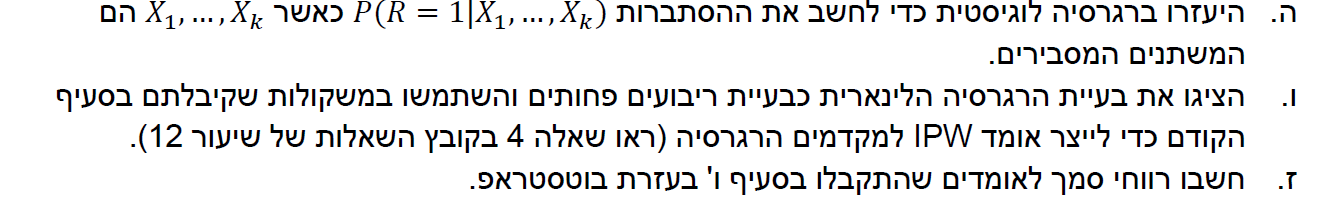

לאחר פיתוח, זהו האומד למקדמים עבור שיטת ה-IPW:

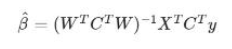

In [341]:
df_athletes.drop(df_athletes.index[df_athletes.isnull().any(axis=1)],0, inplace=True)
n = 1000
seed = 985789
np.random.seed(seed)
a = np.random.choice(len(df_athletes), n, replace=False)
sel = [1,2,3,4]
df = df_athletes.iloc[a,sel]
print(df.sort_values('height'))

seed = 985789
np.random.seed(seed)
chance = np.random.random_sample((1000))

df.sort_values('height')
df_nan = df.sort_values('height').copy()

seed = 98698
np.random.seed(seed)
chance = np.random.random_sample((1000))

chance_weight = np.arange(0.0,0.99999,.001)
for i in range(1000):
    if chance[i] < chance_weight[i]:
        df_nan.height.iloc[i] = math.nan
sum(df_nan.height.isna())


df_w_o_nan = df_nan.copy()
df_w_o_nan.drop(df_nan.index[df_nan.isnull().any(axis=1)],0, inplace=True)

df_R = df_nan.copy()
df_R.height = df_R.isnull().any(axis=1)

X,Y, _, _, _, sel = lin_reg(df_R) 
reg = LogisticRegression()
reg.fit(X = X,y = Y)
C = np.zeros([1000,1000])
np.fill_diagonal(C, (df_R.height.iloc[:])/reg.predict_proba(X)[:,0])

x = df_nan.height.isna()
nan_index = np.nonzero([x])[1]
x = 1 - x
no_nan_index = np.nonzero([x])[1]

print(len(nan_index),len(no_nan_index))

C = np.zeros([len(no_nan_index),len(no_nan_index)])
np.fill_diagonal(C, (1/reg.predict_proba(X)[no_nan_index,1]))
W, Y, _, _, _, sel = lin_reg(df_w_o_nan) 
coef = np.linalg.inv(W.transpose() @ C.transpose() @ W) @ W.transpose() @ C.transpose() @ Y
print(coef)

B = 1000
coef_BS = np.zeros([len(coef),B])
for i in range(B):
    a = np.random.choice(1000, 1000, replace=True)
    df = df_nan.iloc[a,:].copy()
    df_w_o_nan = df.copy()
    df_w_o_nan.drop(df.index[df.isnull().any(axis=1)],0, inplace=True)

    df_R = df.copy()
    df_R.height = df_R.isnull().any(axis=1)

    X,Y, _, _, _, sel = lin_reg(df_R) 
    reg = LogisticRegression()
    reg.fit(X = X,y = Y)
    C = np.zeros([1000,1000])
    np.fill_diagonal(C, (df_R.height.iloc[:])/reg.predict_proba(X)[:,0])

    x = df.height.isna()
    nan_index = np.nonzero([x])[1]
    x = 1 - x
    no_nan_index = np.nonzero([x])[1]

#     print(len(nan_index),len(no_nan_index))

    C = np.zeros([len(no_nan_index),len(no_nan_index)])
    np.fill_diagonal(C, (1/reg.predict_proba(X)[no_nan_index,1]))
    W, Y, _, _, _, sel = lin_reg(df_w_o_nan) 
    coef_BS[:,i] = (np.linalg.inv(W.transpose() @ C.transpose() @ W) @ W.transpose() @ C.transpose() @ Y)
CI = np.zeros([len(coef_BS[1:,:]),2])

for i in range(1, len(coef_BS)):
    CI[i-1,0] = (np.percentile(coef_BS[i,:], 2.5))    
    CI[i-1,1] = (np.percentile(coef_BS[i,:], 97.5))
print(CI)    
CI_IPW = CI.copy()
beta_IPW = coef[1:].copy()

sel_IPW = sel.copy()

          sex  height  weight          sport
6771   female    1.50    44.0      athletics
2588   female    1.51    53.0  weightlifting
9534   female    1.51    43.0       shooting
10728  female    1.52    48.0           judo
3449     male    1.53   125.0      wrestling
...       ...     ...     ...            ...
2446     male    2.10   102.0     basketball
2511     male    2.10   122.0     basketball
2868     male    2.10   100.0     basketball
2510     male    2.11   120.0     basketball
7606     male    2.13   121.0     basketball

[1000 rows x 4 columns]
499 501
[ 1.35997533  0.01606802  0.02949308 -0.00831321 -0.04468295  0.00649807
  0.01116358  0.00924587 -0.03348837 -0.00989671 -0.04806297  0.00514943
  0.02102878]
[[-0.01241159  0.02984437]
 [ 0.00529754  0.04501267]
 [-0.05282576  0.01437   ]
 [-0.06451098  0.03004642]
 [-0.07104806  0.02779255]
 [-0.06728783  0.03146374]
 [-0.09312497  0.03201154]
 [-0.09435945  0.03742956]
 [-0.10812842  0.04044092]
 [-0.10864554  0.0411611

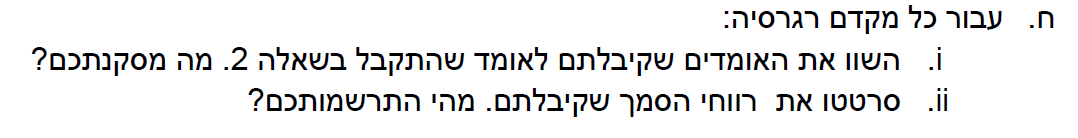

In [342]:
def plot_CI(i):
    sel = [
        'athletics',
        'aquatics',
        'football',
        'rowing',
        'handball',
        'canoe',
        'volleyball',
        'sailing',
        'basketball',
        'cycling',
        'weight',
        'male'
        ]
    data_dict = {}
    data_dict['category'] = [
            'Original (based all the data)',
            'Regression imputation',
        'Multiple imputation',
            'IPW',
        ]
    data_dict['lower'] = [
            CI_original[i,0] - CI_original[i,1],
            CI_with_nan[i,0] - CI_with_nan[i,1],
            CI_for_multiple[i,0] - CI_for_multiple[i,1],
            CI_IPW[i,0],
            ]

    data_dict['upper'] = [
            CI_original[i,0] + CI_original[i,1],
            CI_with_nan[i,0] + CI_with_nan[i,1],
            CI_for_multiple[i,0] + CI_for_multiple[i,1],
            CI_IPW[i,1],
            ]

    data_dict['estimator'] = [
            CI_original[i,0],
            CI_with_nan[i,0],
            CI_for_multiple[i,0],
            beta_IPW[i]
            ]

    dataset = pd.DataFrame(data_dict)
    color = ['pink','orange','black','purple']
    plt.figure(figsize=(4,2), dpi = 200)    

    for lower,upper,est,y in zip(dataset['lower'],dataset['upper'],dataset['estimator'],range(len(dataset))):
        plt.plot((lower,est,upper),(y,y,y),'ro-',color=color[y],linewidth=3)
    plt.yticks(range(len(dataset)),list(dataset['category']))
    
    plt.title(f'{sel[i].capitalize()}')
    plt.ylim([-0.5,3.5])
    plt.grid('on')
    plt.show()

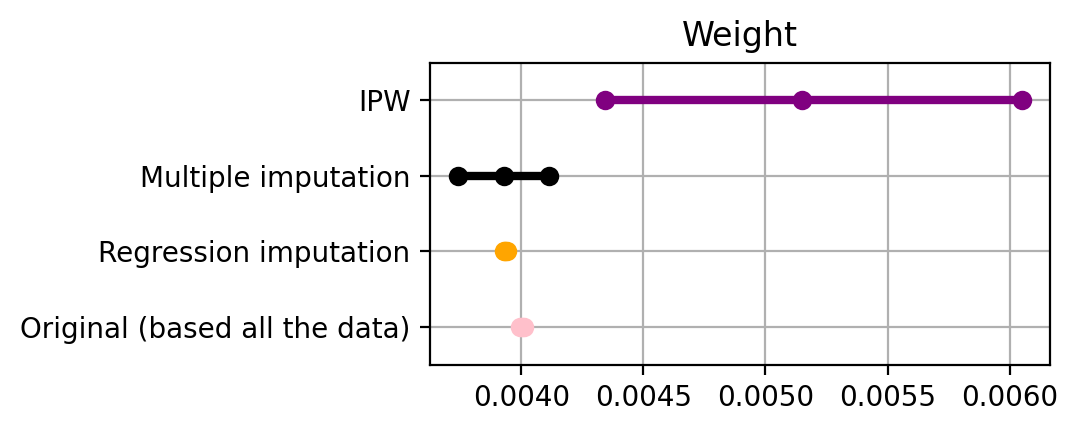

In [343]:
plot_CI(i = -2)

ניתן לראות בה-IPW נתן מקדם מאוד שונה מהשאר.

כצפוי מקדם ע"פ הרגרסיה התקבל עם שונות קטנה מאוד - בשל העובדה שתחזית על קו הרגרסיה מקטינה את השונות


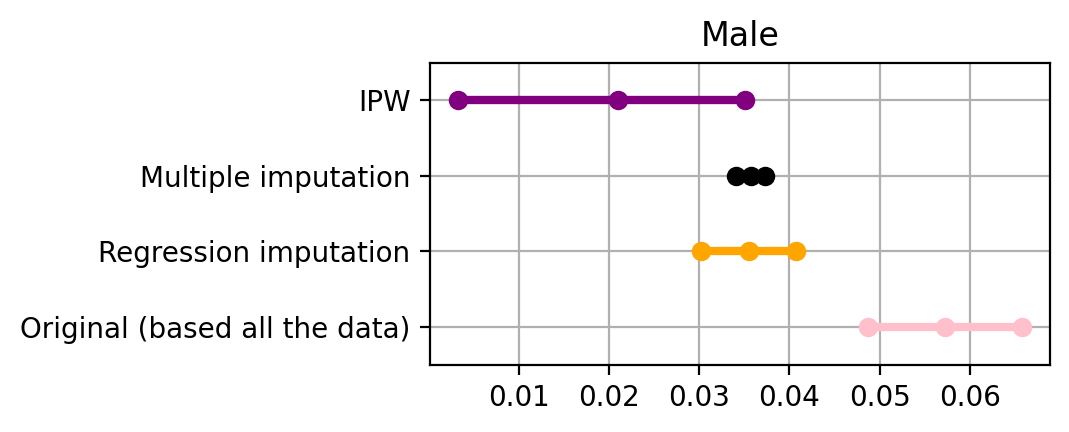

In [344]:
plot_CI(i = -1)

עבור מקדם המגדר כל שיטות ההשלמה לא קלעו למקדם האמיתי.

מקדם ה-IPW היה עם החריגה הגדולה ביותר והשונות הגדולה ביותר

מקדם הרגרסיה והדגימה המרובה נתנו תחזית דומה יחסית , כאשר למקדם הרגרסיה שונות גדולה יותר

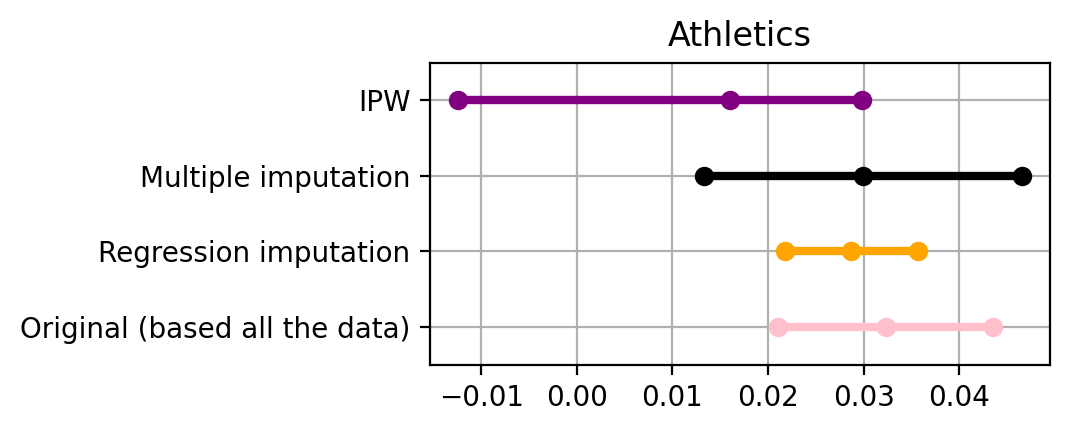

In [345]:
plot_CI(i = 0)

מקדם עבור ענף האלטיקה

משיטות הרגרסיה והדגימה המרובה נתנו מקדם דומה למקדם האמיתי

כאשר השונות של ה-IPW היתה הגדולה ביותר


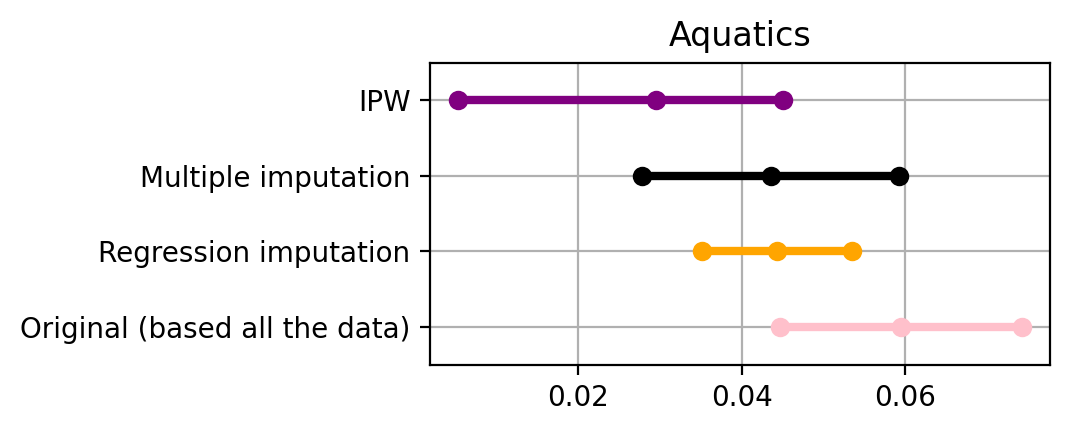

In [346]:
plot_CI(i = 1)

עבור ענף השחיה

משיטות הרגרסיה והדגימה המרובה נתנו מקדם קטן במקצת מהמקדם האמיתי


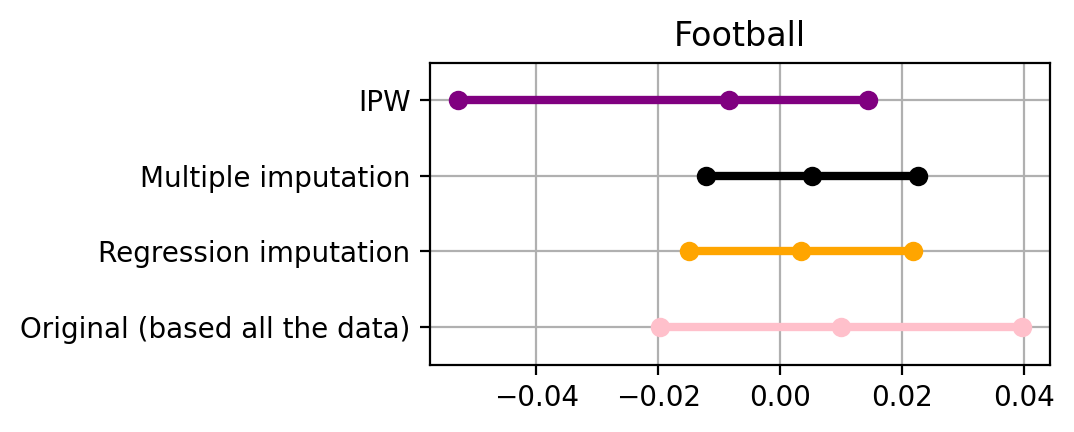

In [347]:
plot_CI(i = 2)

עבור ענף הכדורגל

עבור ה-IPW התקבלה השונות הגדולה ביותר

#### סיכום

1. IPW - עבור שיטה זו התקבלו המקדמים השונים ביותר מהאמיתי וכן בעלי השונות הגדולה ביותר


2. עבור שיטת ה- multiple 

התקבלו לרוב מקדמים מקדמים למקדם האמיתי

יתרונה של שיטה זו שהיא מתייחסת גם לשונות של האומד


3. בשיטת הרגרסיה התקדמו מקדמים דומים יחסית למקדם אמיתי

חסרונה של השיטה הוא שהיא מקטינה (מעלימה) את השונות האמיתית


נראה כי השיטה העדיפה להשלמת נתונים היא

multiple imputation